# EDA YOUTUBE DAILY TRENDING DATASETS CANADA

## IMPORT LIBRARY YANG DIPERLUKAN

In [1]:
# import library
import pandas as pd
import json as js
from pandas.io.json import json_normalize

# import matplotlib
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# import seaborn
import seaborn as sns
%matplotlib inline

# import stats
from scipy import stats
import statistics

# ignore userwarning
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# import WordCloud
# conda install -c https://conda.anaconda.org/conda-forge wordcloud
from wordcloud import WordCloud

In [2]:
# import bokeh
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.models import ColumnDataSource, BasicTickFormatter
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis11, Cividis11, Plasma11, Greys11

In [3]:
# load datasets CA
dfCAvideos = pd.read_csv("datasets/CAvideos.csv")
dfCAcategory = pd.read_csv("datasets/CACategories.csv")

# set option agar float dapat ditampilkan seluruhnya
pd.set_option('float_format', '{:f}'.format)

## IDENTIFIKASI ATRIBUT DATA VIDEO CANADA
Berikut adalah atribut data video dari region Canada :

In [4]:
dfCAvideos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

#### Karena kolom trending_date pada semua data video adalah string dengan format year.month.day (contoh : 17.11.14), maka objek dari kolom tersebut perlu diubah menjadi bentuk datetime

In [5]:
dfCAvideos['trending_date'] =  pd.to_datetime(dfCAvideos['trending_date'], format='%y.%d.%m')

In [6]:
dfCAvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [7]:
dfCAvideos.shape

(40881, 16)

Berdasarkan pengecekan data video dari region Canada memiliki dimensi <b>40881 baris x 16 kolom</b>.

## DATA KATEGORI VIDEO REGION CANADA
Berikut adalah data kategori video region Canada setelah diubah menjadi dataframe :

In [8]:
dfCAcategory

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,19,Travel & Events
6,20,Gaming
7,22,People & Blogs
8,23,Comedy
9,24,Entertainment


In [9]:
dfCAcategory.shape

(17, 2)

Berdasarkan pengecekan data kategori region Canada memiliki dimensi <b>31 baris x 2 kolom</b>.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## A. STATISTIK DARI SETIAP KATEGORI YANG TERDAPAT DI DATAFRAME VIDEOS CANADA
Kita perlu mengetahui statistik berikut untuk setiap kategori :
#### 1. Data tertinggi, terendah, dan rata-rata viewer
#### 2. Data tertinggi, terendah, dan rata-rata likes
#### 3. Data tertinggi, terendah, dan rata-rata dislikes
#### 4. Data tertinggi, terendah, dan rata-rata jumlah komentar

Di sini kita akan menemukan statistik data video dari region Canada menggunakan list <b>gCAvideo</b> yang mana adalah list di mana video kelompokkan berdasarkan id kategori.<br/>

Untuk menemukan rata-rata digunakan fungsi <b>.max()</b> pada data grup id kategori yang diinginkan. Untuk menemukan value tertinggi digunakan <b>.max()</b> dan untuk menemukan value terkecil digunakan <b>.min()</b>

In [10]:
# mengelompokan berdasarkan id kategori
gCAvideo = dfCAvideos.groupby('category_id')

### 1A. Data tertinggi, terendah, dan rata-rata viewer Canada

In [11]:
# memasukkan data ke dalam list
data_view_ca = {
    
    # id kategori
    'id' : [items for items in dfCAcategory['id']],
    #penonton tertinggi
    'highest_views':[gCAvideo.get_group(items)['views'].max() for items in dfCAcategory['id']],
    
    #penonton terendah
    'lowest_views':[gCAvideo.get_group(items)['views'].min() for items in dfCAcategory['id']],
    
    #penonton rata-rata
    'average_views':[gCAvideo.get_group(items)['views'].mean() for items in dfCAcategory['id']],

    #median data
    'median_views':[gCAvideo.get_group(items)['views'].median() for items in dfCAcategory['id']
                   ]}

dfViewCA = pd.DataFrame(data_view_ca)

In [12]:
dfViewCA = pd.merge(dfCAcategory,dfViewCA,on="id")

print("")
print("DATA VIEWER SETIAP KATEGORI DI REGION CANADA")
dfViewCA


DATA VIEWER SETIAP KATEGORI DI REGION CANADA


,id,category,highest_views,lowest_views,average_views,median_views
0,1,Film & Animation,27696924,2274,1426728.565049,460852.000000
1,2,Autos & Vehicles,11004698,3059,566759.416431,391515.000000
2,10,Music,98938809,3201,3532524.844278,1216670.000000
3,15,Pets & Animals,5954189,8171,638461.173442,337492.000000
4,17,Sports,24117244,1023,1075583.849300,390040.000000
5,19,Travel & Events,4169455,3144,366701.408163,264524.500000
6,20,Gaming,14589314,3494,923759.215030,411583.000000
7,22,People & Blogs,51243149,1187,786413.623873,270925.000000
8,23,Comedy,14228882,1295,982888.625762,583684.000000
9,24,Entertainment,137843120,733,1016371.683072,346166.000000


In [13]:
# sort
dfViewCA_sortHighest = dfViewCA.sort_values(by="highest_views",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfViewCA_sortHighest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='highest_views', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Viridis11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='VIEWER TERTINGGI BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Viewer'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Viewer',  '@highest_views' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

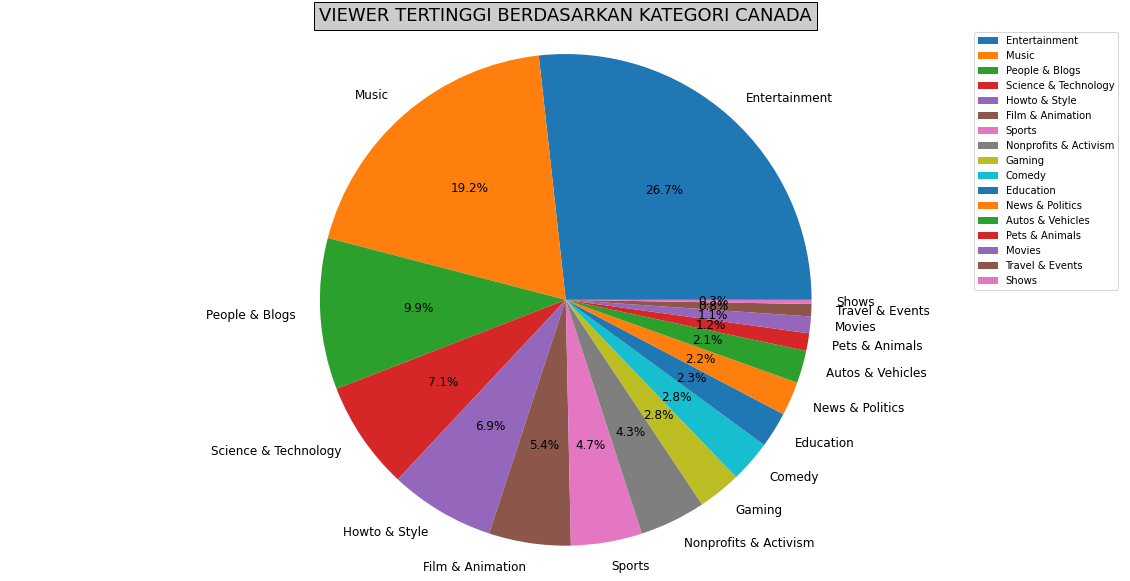

In [14]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfViewCA_sortHighest['highest_views'], labels=dfViewCA_sortHighest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("VIEWER TERTINGGI BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [15]:
# sort
dfViewCA_sortLowest = dfViewCA.sort_values(by="lowest_views",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfViewCA_sortLowest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='lowest_views', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Cividis11,
        factors=source.data['category'].tolist()
    )
)

# judul 
p.title.text ='VIEWER TERENDAH BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Viewer'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Viewer',  '@lowest_views' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

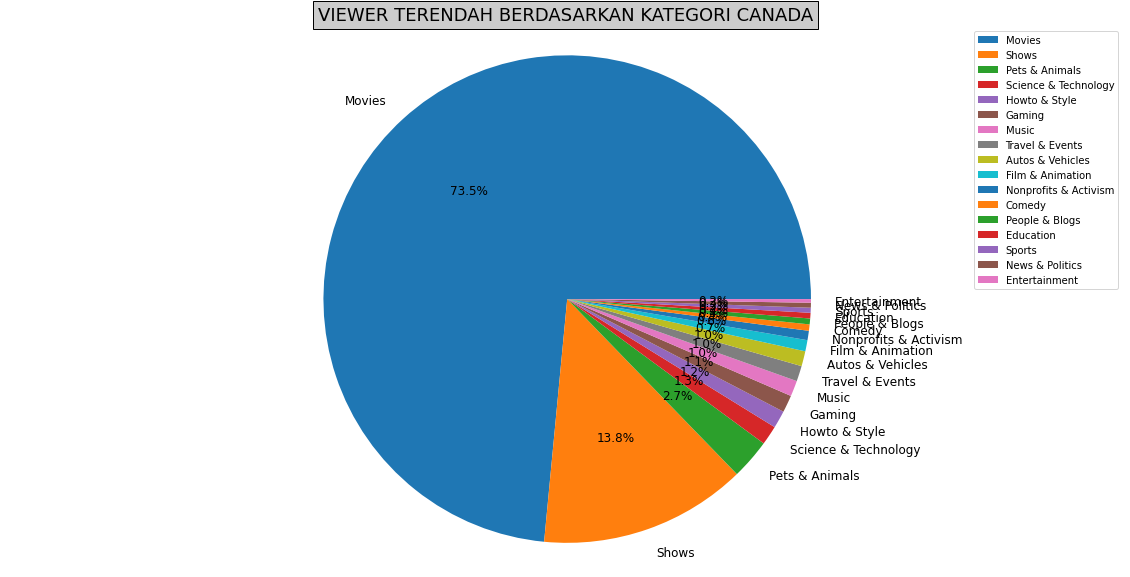

In [16]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfViewCA_sortLowest['lowest_views'], labels=dfViewCA_sortLowest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("VIEWER TERENDAH BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [17]:
# sort
dfViewCA_sortAvg = dfViewCA.sort_values(by="average_views",ascending=False)

# buat ColumnDataSource dari dataframe dfViewCA
source = ColumnDataSource(dfViewCA_sortAvg)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='average_views', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Plasma11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='VIEWER RATA-RATA BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Viewer'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Rata-rata Viewer',  '@average_views' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

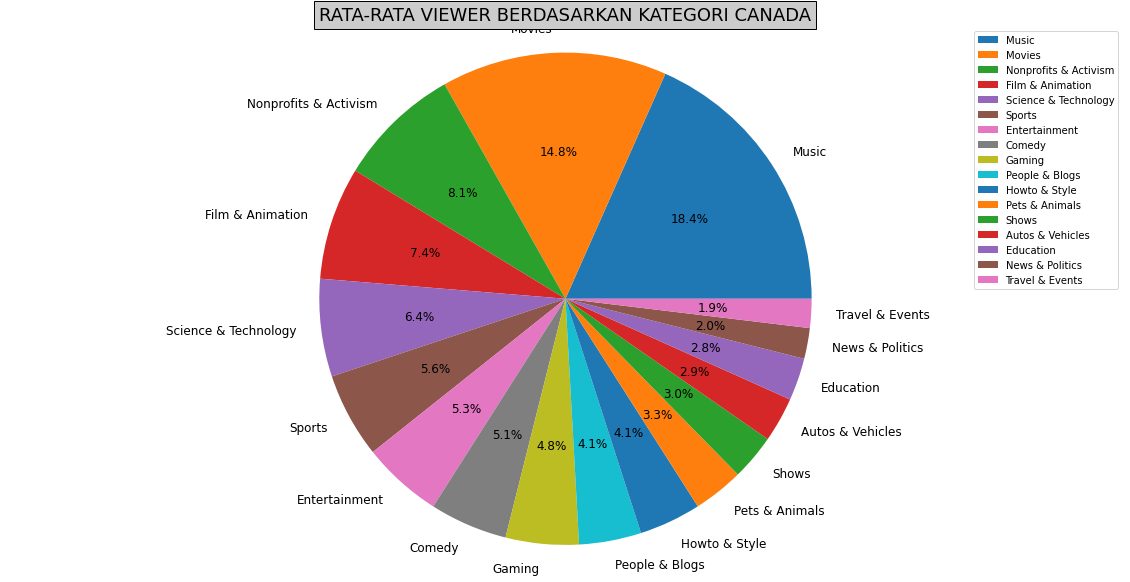

In [18]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfViewCA_sortAvg['average_views'], labels=dfViewCA_sortAvg['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("RATA-RATA VIEWER BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [19]:
# sort
dfViewCA_sortMedian = dfViewCA.sort_values(by="median_views",ascending=False)

# buat ColumnDataSource dari dataframe dfViewCA
source = ColumnDataSource(dfViewCA_sortMedian)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='median_views', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Greys11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='MEDIAN VIEWER BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Viewer'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Median Viewer',  '@median_views' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

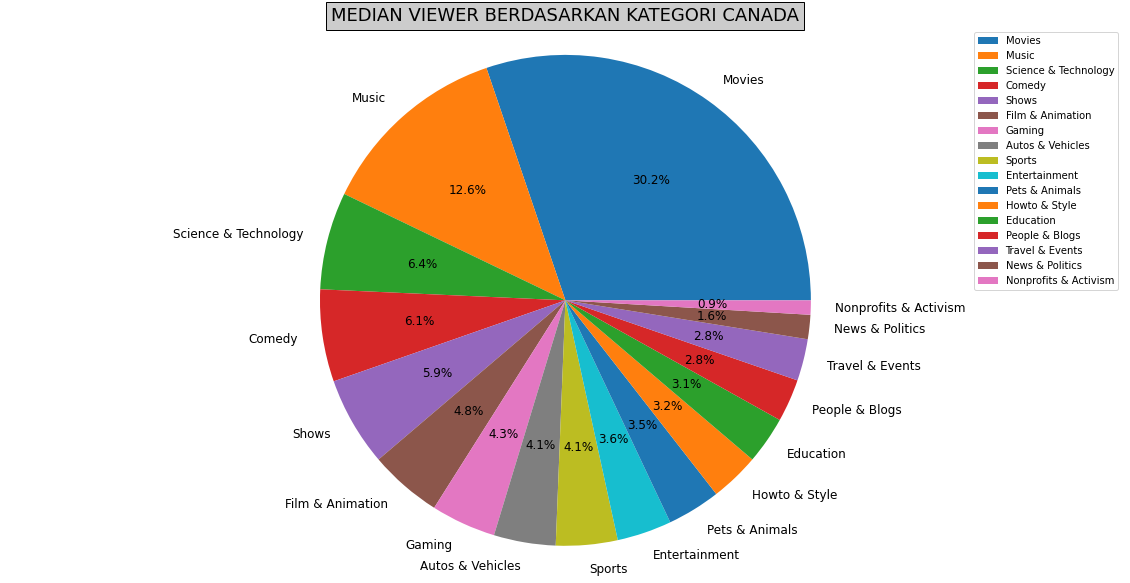

In [20]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfViewCA_sortMedian['median_views'], labels=dfViewCA_sortMedian['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("MEDIAN VIEWER BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

### 2A. Data tertinggi, terendah, dan rata-rata likes Canada

In [21]:
# memasukkan data ke dalam list
data_likes_ca = {
    
    'id' : [items for items in dfCAcategory['id']],
    'highest_likes':[gCAvideo.get_group(items)['likes'].max() for items in dfCAcategory['id']],
    'lowest_likes':[gCAvideo.get_group(items)['likes'].min() for items in dfCAcategory['id']],
    'average_likes':[gCAvideo.get_group(items)['likes'].mean() for items in dfCAcategory['id']],
    'median_likes':[gCAvideo.get_group(items)['likes'].median() for items in dfCAcategory['id']
                   ]}

dfLikesCA = pd.DataFrame(data_likes_ca)

In [22]:
dfLikesCA = pd.merge(dfCAcategory,dfLikesCA,on="id")

print("")
print("DATA LIKES SETIAP KATEGORI DI REGION CANADA")
dfLikesCA


DATA LIKES SETIAP KATEGORI DI REGION CANADA


,id,category,highest_likes,lowest_likes,average_likes,median_likes
0,1,Film & Animation,532660,0,37767.962621,12627.000000
1,2,Autos & Vehicles,86125,40,13405.422096,13046.000000
2,10,Music,5053338,0,151285.856339,50958.000000
3,15,Pets & Animals,193092,215,23931.533875,15361.000000
4,17,Sports,926660,0,21330.972013,3484.000000
5,19,Travel & Events,135057,4,9568.658163,8516.000000
6,20,Gaming,340240,0,38487.017857,19161.500000
7,22,People & Blogs,1967910,0,25673.219001,5372.000000
8,23,Comedy,831516,4,51960.422475,22414.000000
9,24,Entertainment,3014479,0,28789.341536,6208.000000


In [23]:
# sort
dfLikesCA_sortHighest = dfLikesCA.sort_values(by="highest_likes",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfLikesCA_sortHighest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='highest_likes', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Viridis11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='LIKES TERTINGGI BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Likes'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Likes',  '@highest_likes' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

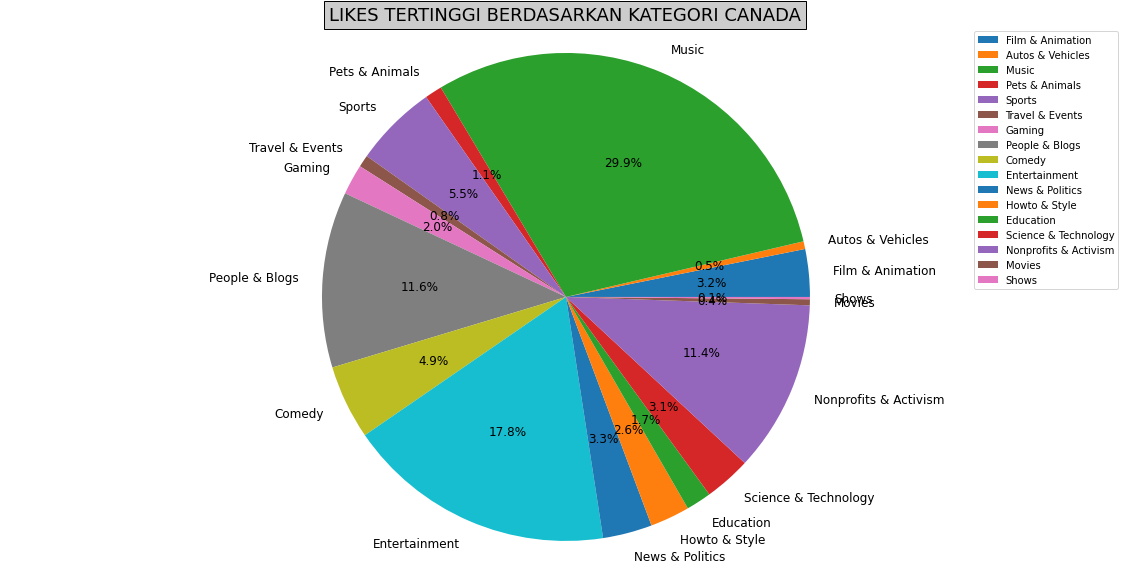

In [24]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfLikesCA['highest_likes'], labels=dfLikesCA['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("LIKES TERTINGGI BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [25]:
# sort
dfLikesCA_sortLowest = dfLikesCA.sort_values(by="lowest_likes",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfLikesCA_sortLowest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='lowest_likes', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Cividis11,
        factors=source.data['category'].tolist()
    )
)

# judul 
p.title.text ='LIKES TERENDAH BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Likes'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Likes',  '@lowest_likes' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

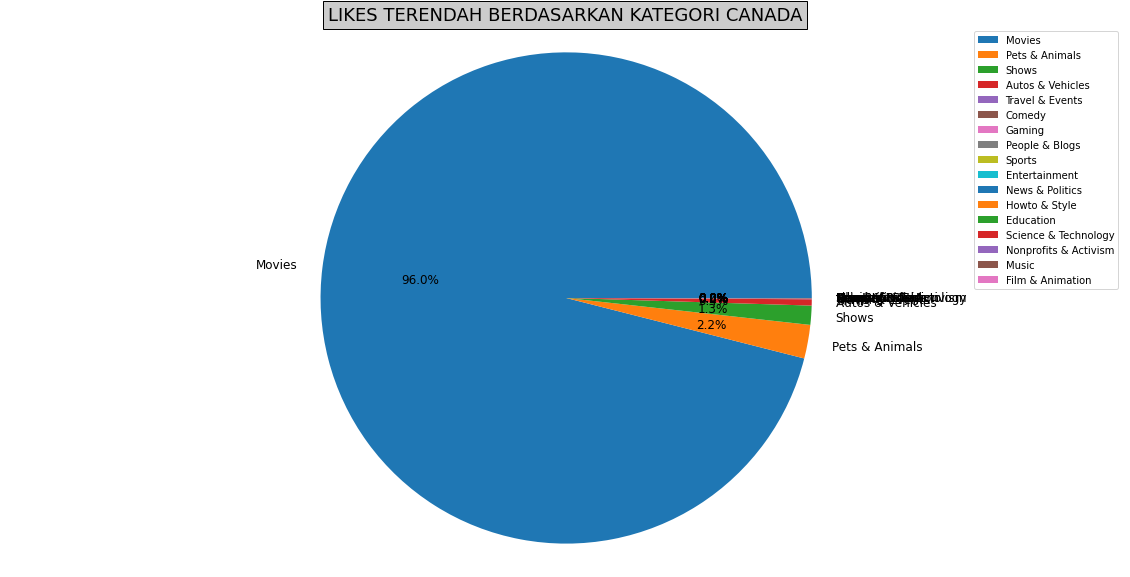

In [26]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfLikesCA_sortLowest['lowest_likes'], labels=dfLikesCA_sortLowest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("LIKES TERENDAH BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [27]:
# sort
dfLikesCA_sortAvg = dfLikesCA.sort_values(by="average_likes",ascending=False)

# buat ColumnDataSource dari dataframe dfLikesCA
source = ColumnDataSource(dfLikesCA_sortAvg)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='average_likes', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Plasma11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='LIKES RATA-RATA BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Likes'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Rata-rata Viewer',  '@average_likes' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

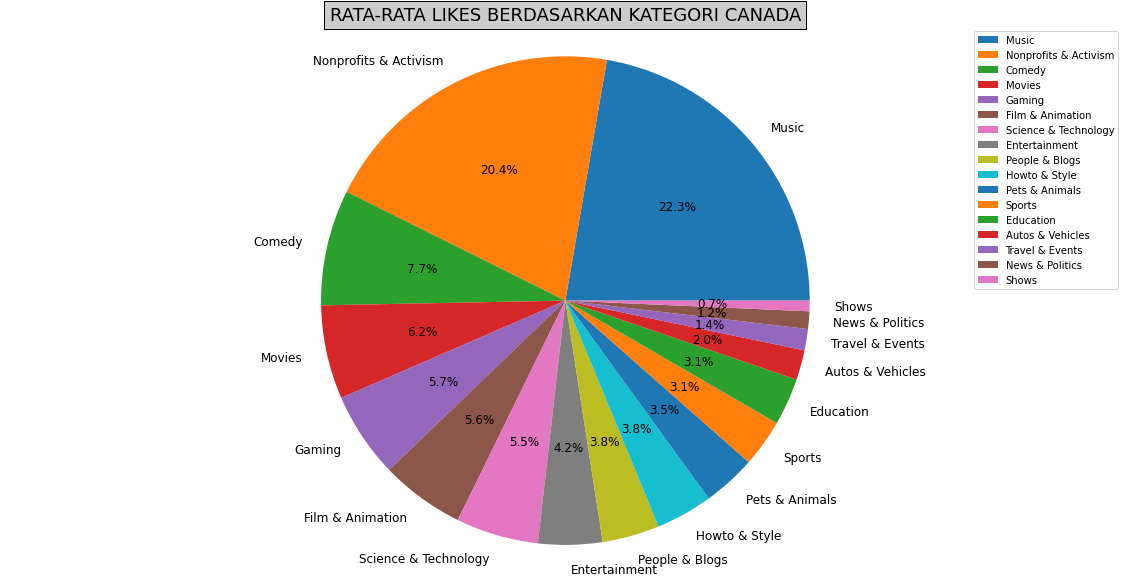

In [28]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfLikesCA_sortAvg['average_likes'], labels=dfLikesCA_sortAvg['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("RATA-RATA LIKES BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [29]:
# sort
dfLikesCA_sortMedian = dfLikesCA.sort_values(by="median_likes",ascending=False)

# buat ColumnDataSource dari dataframe dfLikesCA
source = ColumnDataSource(dfLikesCA_sortMedian)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='median_likes', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Greys11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='MEDIAN LIKES BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Likes'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Median Viewer',  '@median_likes' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

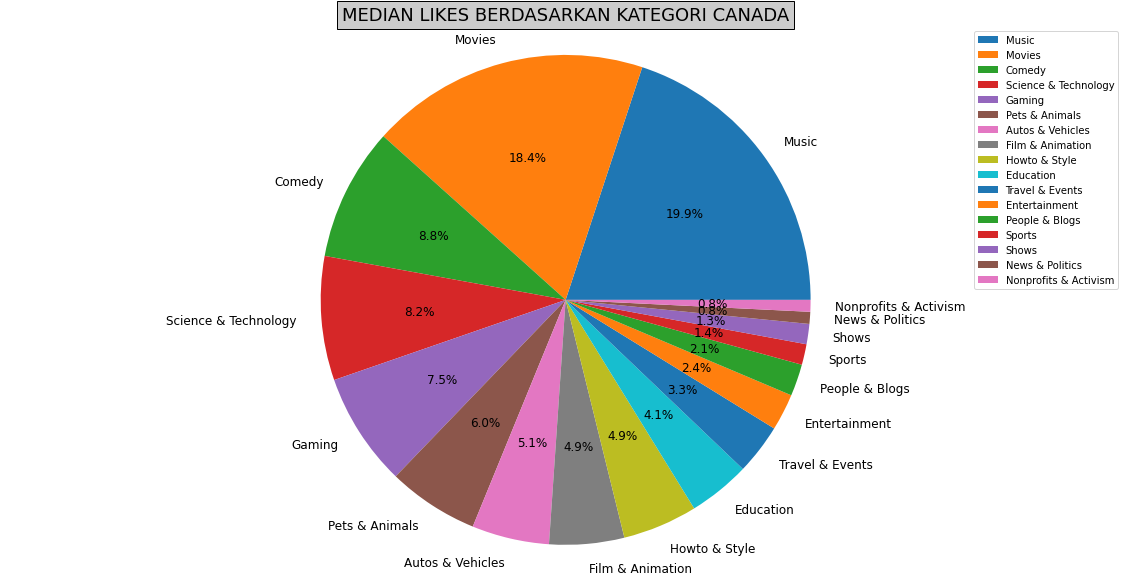

In [30]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfLikesCA_sortMedian['median_likes'], labels=dfLikesCA_sortMedian['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("MEDIAN LIKES BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

### 3B. Data tertinggi, terendah, dan rata-rata dislikes Canada

In [31]:
# memasukkan data ke dalam list
data_dislikes_ca = {
    
    'id' : [items for items in dfCAcategory['id']],
    'highest_dislikes':[gCAvideo.get_group(items)['dislikes'].max() for items in dfCAcategory['id']],
    'lowest_dislikes':[gCAvideo.get_group(items)['dislikes'].min() for items in dfCAcategory['id']],
    'average_dislikes':[gCAvideo.get_group(items)['dislikes'].mean() for items in dfCAcategory['id']],
    'median_dislikes':[gCAvideo.get_group(items)['dislikes'].median() for items in dfCAcategory['id']
                   ]}

dfDislikesCA = pd.DataFrame(data_dislikes_ca)

In [32]:
dfDislikesCA = pd.merge(dfCAcategory,dfDislikesCA,on="id")

print("")
print("DATA DISLIKES SETIAP KATEGORI DI REGION CANADA")
dfDislikesCA


DATA DISLIKES SETIAP KATEGORI DI REGION CANADA


,id,category,highest_dislikes,lowest_dislikes,average_dislikes,median_dislikes
0,1,Film & Animation,60025,0,1510.319903,317.500000
1,2,Autos & Vehicles,12290,1,560.271955,299.000000
2,10,Music,165854,0,5922.859823,1285.000000
3,15,Pets & Animals,7732,5,501.363144,248.000000
4,17,Sports,164693,0,1179.177969,185.000000
5,19,Travel & Events,7688,0,331.278061,200.000000
6,20,Gaming,174645,0,1820.596726,297.000000
7,22,People & Blogs,504340,0,2309.572716,207.000000
8,23,Comedy,43698,0,1423.937185,518.000000
9,24,Entertainment,1602383,0,1917.447253,260.000000


### 4B. Data tertinggi, terendah, dan rata-rata jumlah komentar Canada

In [33]:
# memasukkan data ke dalam list
data_comments_ca = {

    'id' : [items for items in dfCAcategory['id']],
    'highest_comments':[gCAvideo.get_group(items)['comment_count'].max() for items in dfCAcategory['id']],
    'lowest_comments':[gCAvideo.get_group(items)['comment_count'].min() for items in dfCAcategory['id']],
    'average_comments':[gCAvideo.get_group(items)['comment_count'].mean() for items in dfCAcategory['id']],
    'median_comments':[gCAvideo.get_group(items)['comment_count'].median() for items in dfCAcategory['id']
                   ]}

dfCommentsCA = pd.DataFrame(data_comments_ca)

In [34]:
dfCommentsCA = pd.merge(dfCAcategory,dfCommentsCA,on="id")

print("")
print("DATA COMMENTS SETIAP KATEGORI DI REGION CANADA")
dfCommentsCA


DATA COMMENTS SETIAP KATEGORI DI REGION CANADA


,id,category,highest_comments,lowest_comments,average_comments,median_comments
0,1,Film & Animation,105587,0,4896.394660,1437.500000
1,2,Autos & Vehicles,29574,0,2878.719547,1981.000000
2,10,Music,1114800,0,14053.940499,3544.000000
3,15,Pets & Animals,45306,0,4941.837398,2112.000000
4,17,Sports,63560,0,2748.956584,943.000000
5,19,Travel & Events,13612,0,1556.002551,1184.000000
6,20,Gaming,122659,0,7191.136161,2521.500000
7,22,People & Blogs,349112,0,4097.003898,879.000000
8,23,Comedy,83116,0,5205.082428,2282.000000
9,24,Entertainment,827755,0,4112.187644,1038.000000


In [35]:
# sort
dfCommentsCA_sortHighest = dfCommentsCA.sort_values(by="highest_comments",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfCommentsCA_sortHighest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='highest_comments', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Viridis11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='JUMLAH KOMENTAR TERTINGGI BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Komentar'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Komentar',  '@highest_comments' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

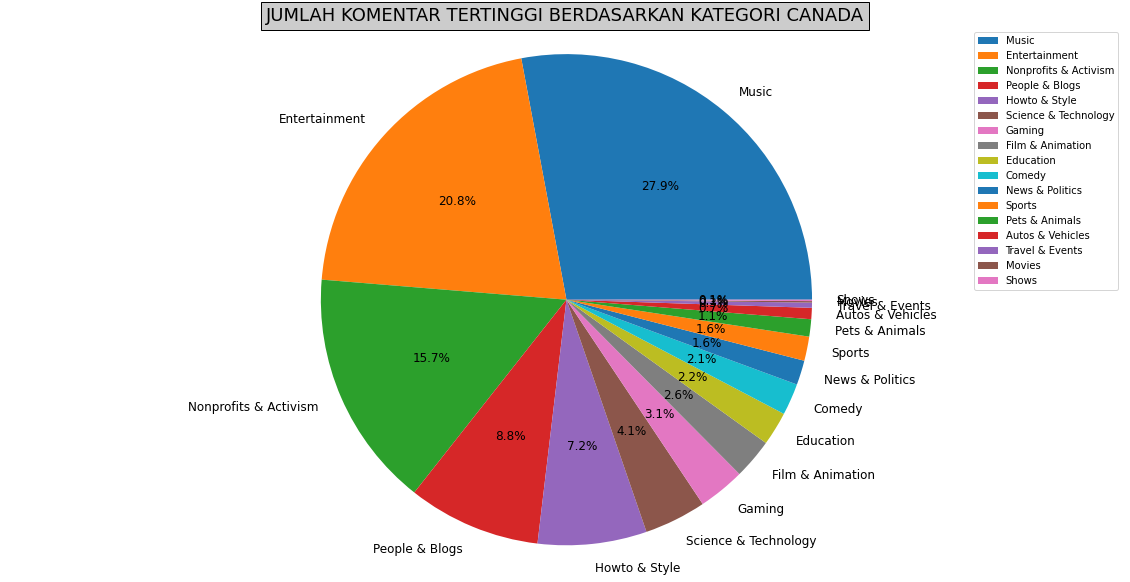

In [36]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfCommentsCA_sortHighest['highest_comments'], labels=dfCommentsCA_sortHighest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("JUMLAH KOMENTAR TERTINGGI BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [37]:
# sort
dfCommentsCA_sortLowest = dfCommentsCA.sort_values(by="lowest_comments",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfCommentsCA_sortLowest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='lowest_comments', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Cividis11,
        factors=source.data['category'].tolist()
    )
)

# judul 
p.title.text ='JUMLAH KOMENTAR TERENDAH BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Komentar'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Komentar',  '@lowest_comments' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

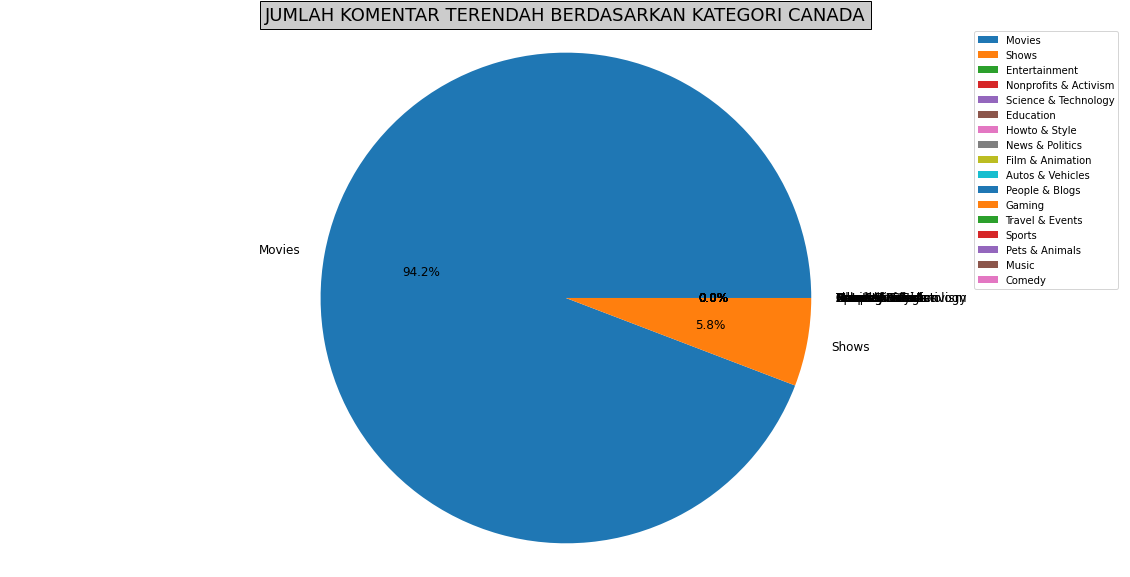

In [38]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfCommentsCA_sortLowest['lowest_comments'], labels=dfCommentsCA_sortLowest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("JUMLAH KOMENTAR TERENDAH BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [39]:
# sort
dfCommentsCA_sortAvg = dfCommentsCA.sort_values(by="average_comments",ascending=False)

# buat ColumnDataSource dari dataframe dfCommentsCA
source = ColumnDataSource(dfCommentsCA_sortAvg)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='average_comments', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Plasma11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='JUMLAH KOMENTAR RATA-RATA BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Komentar'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Rata-rata Komentar',  '@average_comments' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

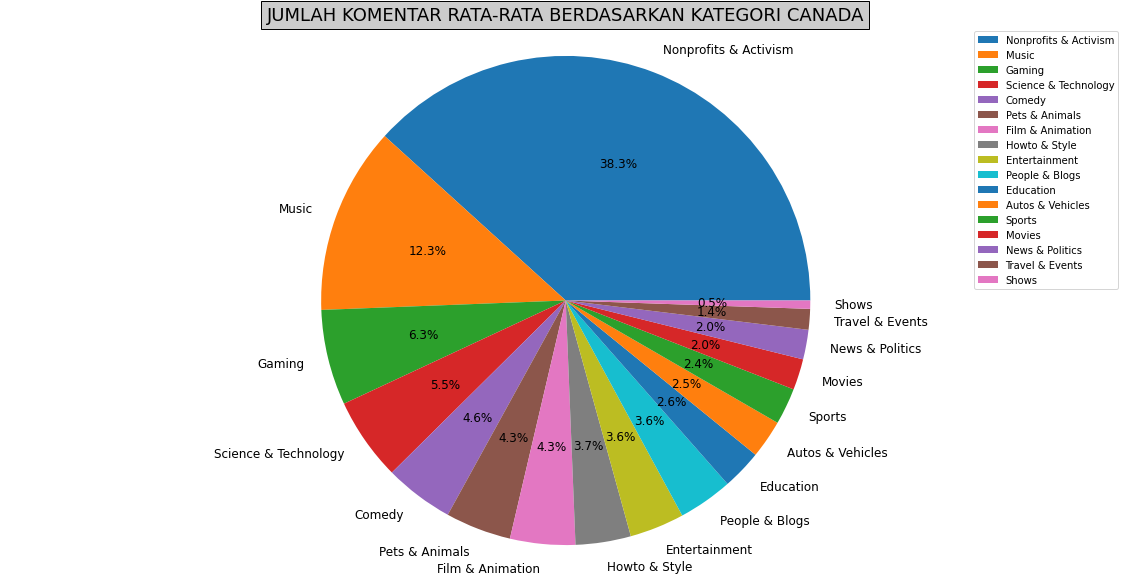

In [40]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfCommentsCA_sortAvg['average_comments'], labels=dfCommentsCA_sortAvg['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("JUMLAH KOMENTAR RATA-RATA BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [41]:
# sort
dfCommentsCA_sortMedian = dfCommentsCA.sort_values(by="median_comments",ascending=False)

# buat ColumnDataSource dari dataframe dfCommentsCA
source = ColumnDataSource(dfCommentsCA_sortMedian)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='median_comments', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Greys11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='MEDIAN KOMENTAR BERDASARKAN KATEGORI CANADA'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Komentar'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Median Komentar',  '@median_comments' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

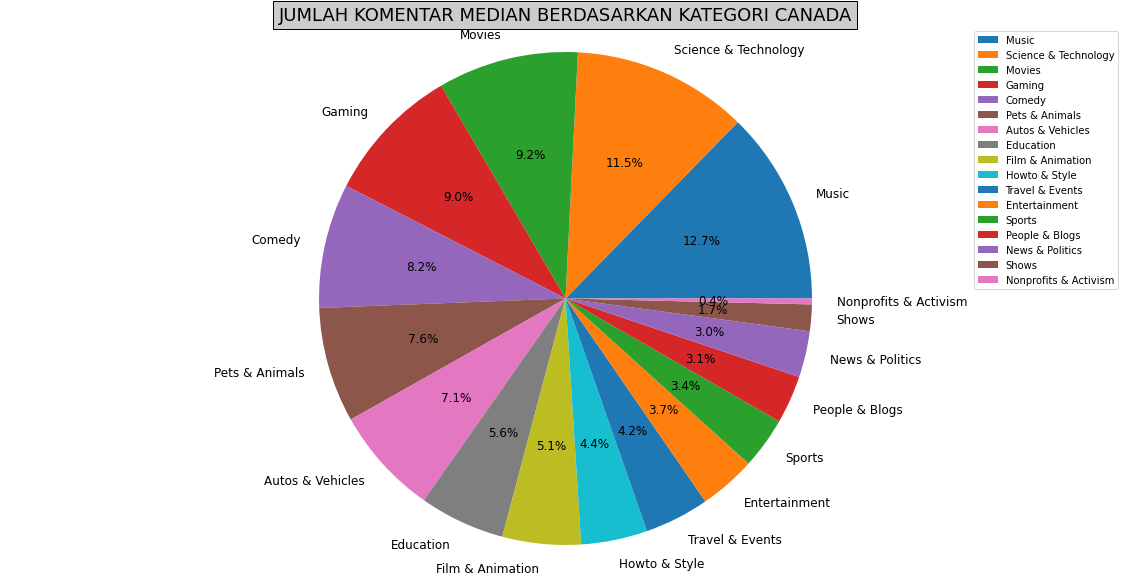

In [42]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfCommentsCA_sortMedian['median_comments'], labels=dfCommentsCA_sortMedian['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("JUMLAH KOMENTAR MEDIAN BERDASARKAN KATEGORI CANADA", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

### 5B. Melihat pengaruh tag terhadap kategori dengan viewer rata-rata tertinggi

Setelah ditelusuri pada negara Canada viewer rata-rata tertinggi adalah kategori 'Music'. Di sini akan ditelaah tag apa yang paling sering digunakan oleh pengunggah video dan divisualisasikan dengan Word Cloud. Kemudian akan dilaah dampaknya terhadap jumlah viewer 

In [43]:
# membuat dataframe baru berisi video-video dengan kategori 'Music' dengan category_id 10
dfCAmusic = dfCAvideos[dfCAvideos['category_id'] == 10]

In [44]:
dfCAmusic

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
10,H1KBHFXm2Bg,2017-11-14,21 Savage - Bank Account (Official Music Video),21 Savage,10,2017-11-10T19:00:02.000Z,"21 savage|""bank account""|""21 savage bank accou...",5068229,263596,8585,28976,https://i.ytimg.com/vi/H1KBHFXm2Bg/default.jpg,False,False,False,Watch the official music video of Bank Account...
13,7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
29,j67FgNEvyh8,2017-11-14,Telefoon || Babbu Maan || Promo || Full Song 1...,Hey Yolo,10,2017-11-12T04:24:34.000Z,"Telefoon|""Babbu Maan""|""Mehfil Mitran Di""|""new ...",178447,4339,96,876,https://i.ytimg.com/vi/j67FgNEvyh8/default.jpg,False,False,False,"Full Song Out Now 15th November\n\nHey Yolo, S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40824,WclDmFacc0c,2018-06-14,Música POP En Inglés 2018 - Música pop para tr...,Encanta Música,10,2018-06-11T14:51:50.000Z,"Música|""POP""|""POP en Inglés""|""Música POP en In...",1288940,4818,537,175,https://i.ytimg.com/vi/WclDmFacc0c/default.jpg,False,False,False,Música POP En Inglés 2018 - Música pop para tr...
40828,64UX1npgRkI,2018-06-14,Sanju: Kar Har Maidaan Fateh | Ranbir Kapoor |...,T-Series,10,2018-06-10T05:31:55.000Z,"Kar Har Maidaan Fateh|""kar har maidan fateh""|""...",19472216,309752,10303,21731,https://i.ytimg.com/vi/64UX1npgRkI/default.jpg,False,False,False,"In the darkest of moments, it’s often your fam..."
40842,QGmIkreNmQ4,2018-06-14,MAGIC! - Kiss Me (Official Video),ournameismagicVEVO,10,2018-06-08T21:47:31.000Z,"Kiss Me|""Latium Records/RCA Records""|""MAGIC!""|...",1073869,63948,356,1672,https://i.ytimg.com/vi/QGmIkreNmQ4/default.jpg,False,False,False,Get the new song “Kiss Me” now:iTunes - http:/...
40857,vg0ZfeszGrU,2018-06-14,Difference | Amrit Maan ft Sonia Maan | Latest...,Bamb Beats,10,2018-06-08T11:13:27.000Z,"amrit maan new song|""amrit maan songs""|""amrit ...",16256855,321798,14006,20453,https://i.ytimg.com/vi/vg0ZfeszGrU/default.jpg,False,False,False,Buy Difference from iTunes: https://apple.co/2...


Kolom tags akan dijadikan list untuk kemudian dilakukan join dan dikonversi menjadi string. Kemudian dilakukan split & strip untuk mendapatkan tags yang diinginkan

In [45]:
# kolom tags tolist()
list_tags_ca = dfCAmusic['tags'].tolist()

list_tags_ca

['Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/Interscope"|"Rap"',
 'edsheeran|"ed sheeran"|"acoustic"|"live"|"cover"|"official"|"remix"|"official video"|"lyrics"|"session"',
 '21 savage|"bank account"|"21 savage bank account"|"bank account 21 savage"|"bank account official"|"bank account 2017"|"bank account official music video"|"bank account music video"|"21 savage official"|"21 savage 2017"|"21 savage music"|"21 savage songs"|"21 savage music video"|"21 savage official music video"|"rap"|"hip hop"|"trap"|"music"|"atlanta rap"|"atlanta"|"atlanta hip hop"|"atlanta trap"|"mike epps"',
 'punjabi songs|"punjabi bhangra"|"punjabi music"|"punjabi bhangra music"|"punjabi latest songs"|"punjabi romantic songs"|"punjabi sad songs"|"punjabi"|"bhangra"|"latest punjabi songs 2017"|"punjab"|"desi"|"speed records"|"mankirt new song"|"daang"|"sukh sanghera"|"deep kahlon"|"mankirt aulakh"',
 'Telefoon|"Babbu Maan"|"Mehfil Mitran Di"|"new punjabi songs"|"The Babbu Maan Store"|"Hey Yolo"|"Swag Music"|"

list_tags_ca akan disatukan dengan fungsi join() agar menjadi string. String baru dengan nama string_tags_ca perlu dibuat terlebih dahulu dengan isi "|" agar "|" bertindak sebagai separator antar isi dari list setelah dilakukan join().

In [46]:
string_tags_ca = "|"

In [47]:
string_tags_ca = string_tags_ca.join(list_tags_ca)

Setelah dilakukan join, karakter " atau double quote perlu dihilangkan dengan fungsi replace()

In [48]:
string_tags_ca = string_tags_ca.replace('"', '')

String dikonversi menjadi lowercase untuk mempermudah penghitungan nantinya.

In [49]:
string_tags_ca = string_tags_ca.lower()

Kemudian fungsi split dilakukan terhadap karakter "|" untuk memisahkan antar teks dalam string tersebut dan menjadikannya array string.

In [50]:
string_tags_ca = string_tags_ca.split("|")

string_tags_ca

['eminem',
 'walk',
 'on',
 'water',
 'aftermath/shady/interscope',
 'rap',
 'edsheeran',
 'ed sheeran',
 'acoustic',
 'live',
 'cover',
 'official',
 'remix',
 'official video',
 'lyrics',
 'session',
 '21 savage',
 'bank account',
 '21 savage bank account',
 'bank account 21 savage',
 'bank account official',
 'bank account 2017',
 'bank account official music video',
 'bank account music video',
 '21 savage official',
 '21 savage 2017',
 '21 savage music',
 '21 savage songs',
 '21 savage music video',
 '21 savage official music video',
 'rap',
 'hip hop',
 'trap',
 'music',
 'atlanta rap',
 'atlanta',
 'atlanta hip hop',
 'atlanta trap',
 'mike epps',
 'punjabi songs',
 'punjabi bhangra',
 'punjabi music',
 'punjabi bhangra music',
 'punjabi latest songs',
 'punjabi romantic songs',
 'punjabi sad songs',
 'punjabi',
 'bhangra',
 'latest punjabi songs 2017',
 'punjab',
 'desi',
 'speed records',
 'mankirt new song',
 'daang',
 'sukh sanghera',
 'deep kahlon',
 'mankirt aulakh',
 'tel

In [51]:
# membuat kolom bernama tag yang berisikan array string string_tags_ca
dfCAmusic_tags = pd.DataFrame(string_tags_ca, columns=['tag'])

In [52]:
#membuat dataframe baru dengan value_counts yang menghitung berapa kali tag muncul dalam datasets dfCAmusic_tags
dfCAmusic_tags_count = pd.DataFrame(dfCAmusic_tags.tag.value_counts().reset_index())

#reset index dari 1
dfCAmusic_tags_count.index = dfCAmusic_tags_count.index + 1

#rename kolom
dfCAmusic_tags_count.columns = ['tag', 'tag_count']

print("TOP 5 TAG DI KATEGORI MUSIC CANADA")
dfCAmusic_tags_count.head(5)

TOP 5 TAG DI KATEGORI MUSIC CANADA


,tag,tag_count
1,rap,496
2,music,458
3,pop,412
4,punjabi songs,410
5,hip hop,346


#### Memvisualisasikan tag yang paling sering muncul di kategori Music negara Canada

Untuk memvisualisasikan tag-tag yang paling sering muncul, digunakan <b>WordCloud</b>.

WordCloud dapat membaca dictionary yang berisikan teksnya lalu frekuensinya.

Langkah pertama adalah mengkonversi dfCAmusic_tags_count menjadi dictionary. Dictionary terdiri dari data yang berasal dari kolom tag dan tag_count pada dataframe dfCAmusic_tags_count

In [53]:
# pembuatan dictionary yang berasal dari dataframe
dict_tags_music_CA = dict(zip(dfCAmusic_tags_count['tag'].tolist(), dfCAmusic_tags_count['tag_count'].tolist()))

dict_tags_music_CA

{'rap': 496,
 'music': 458,
 'pop': 412,
 'punjabi songs': 410,
 'hip hop': 346,
 'latest punjabi songs 2018': 271,
 'punjabi music': 248,
 'music video': 240,
 'punjabi': 232,
 'latest punjabi songs': 223,
 'punjabi latest songs': 214,
 'records': 177,
 'punjabi romantic songs': 171,
 'lyrics': 170,
 'desi': 163,
 '[none]': 162,
 'worldstar': 158,
 'new punjabi songs': 147,
 'drake': 147,
 'punjab': 145,
 'hop': 144,
 'new punjabi songs 2018': 144,
 'songs': 144,
 'hip': 141,
 'official': 140,
 'punjabi songs 2018': 139,
 'punjabi bhangra': 135,
 'speed records': 126,
 'latest punjabi songs 2017': 125,
 'official video': 123,
 '2018': 120,
 'punjabi bhangra music': 118,
 'bhangra': 117,
 'r&b': 114,
 'punjabi sad songs': 113,
 'new': 112,
 'latest songs': 109,
 'live': 109,
 'the': 106,
 'rap music': 97,
 'rca records label': 96,
 'hip hop music': 94,
 'worldstarhiphop': 93,
 'dance': 90,
 'punjabi song': 88,
 'migos': 86,
 'video': 86,
 'wshh': 84,
 'new music': 83,
 'hip-hop': 82,
 

In [54]:
wc = WordCloud(width=800, height=600, background_color ='white').generate_from_frequencies(dict_tags_music_CA)

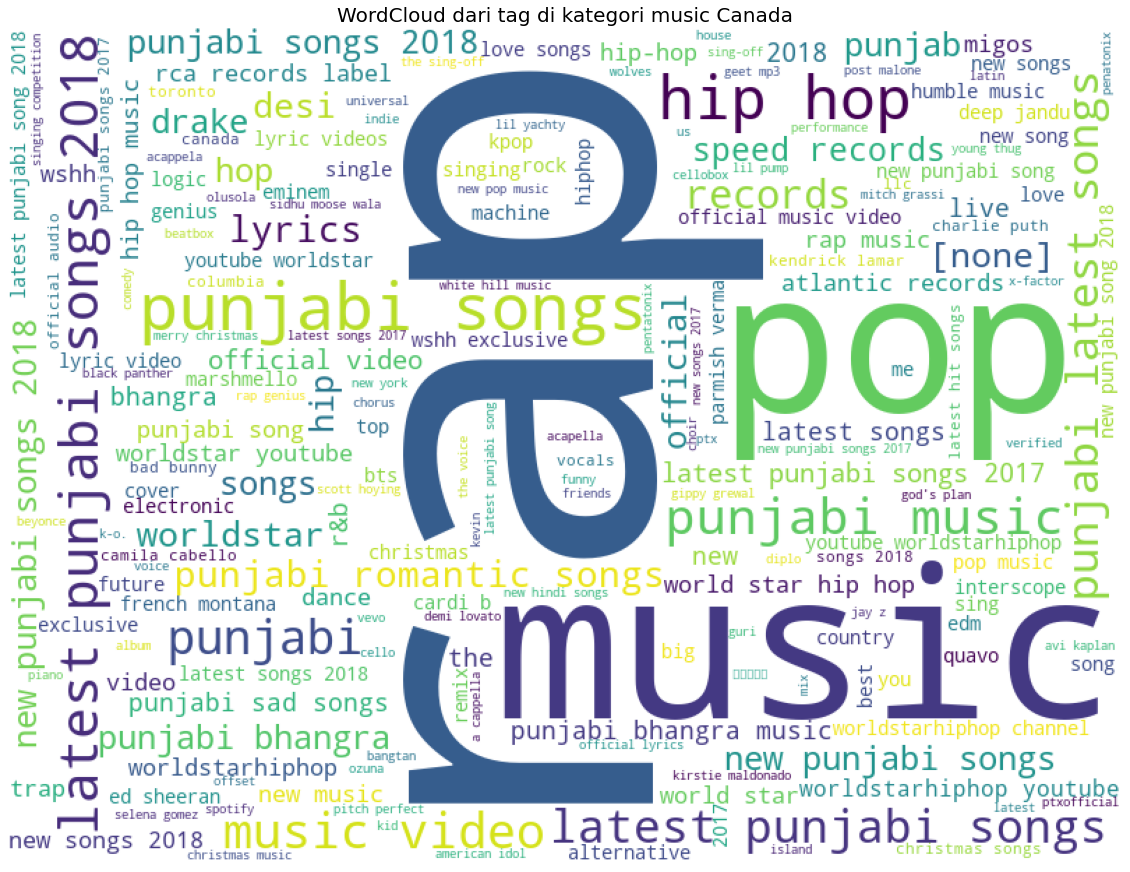

In [55]:
plt.figure(figsize=(20, 20))
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud dari tag di kategori music Canada", fontsize=20)

plt.show()

#### Melihat pengaruh tag terhadap jumlah viewer di kategori Music

In [56]:
dfCAmusic['tags'] = dfCAmusic['tags'].str.lower()

C:\Users\Abi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
dfCAmusic[dfCAmusic['tags'].str.contains("rap")]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"eminem|""walk""|""on""|""water""|""aftermath/shady/in...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
10,H1KBHFXm2Bg,2017-11-14,21 Savage - Bank Account (Official Music Video),21 Savage,10,2017-11-10T19:00:02.000Z,"21 savage|""bank account""|""21 savage bank accou...",5068229,263596,8585,28976,https://i.ytimg.com/vi/H1KBHFXm2Bg/default.jpg,False,False,False,Watch the official music video of Bank Account...
61,MbyP-w4uOgk,2017-11-14,NAV - Wanted You feat. Lil Uzi Vert (Official ...,NAV,10,2017-11-10T16:59:30.000Z,"nav|""wanted you""|""lil uzi vert""|""nav wanted yo...",1064943,38449,466,2335,https://i.ytimg.com/vi/MbyP-w4uOgk/default.jpg,False,False,False,Listen to the official audio of Wanted You by ...
67,amEZKmJQ4Io,2017-11-14,Drako - Watch Me Do It [Official Video],babygranderecords,10,2017-10-23T19:38:36.000Z,"drako|""watch me do it""|""watch me""|""migos""|""dap...",25887,0,0,6,https://i.ytimg.com/vi/amEZKmJQ4Io/default.jpg,False,True,False,PURCHASE / STREAM WATCH ME DO IT https://fanli...
101,YW-EAR8N7y8,2017-11-14,Donnie ft. Puffy L'z - Feeling Great (Official...,Prime,10,2017-11-13T01:15:24.000Z,"donnie|""donnie ft puffy lz feeling great""|""don...",19859,1070,14,132,https://i.ytimg.com/vi/YW-EAR8N7y8/default.jpg,False,False,False,Watch the official music video for Feeling Gre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40262,v4YkNoAun2w,2018-06-11,Rich The Kid - Bring It Back,RichTheKidVEVO,10,2018-06-07T22:57:03.000Z,"rich|""the""|""kid""|""bring""|""it""|""back""|""(tde/isr...",2087987,97503,3539,7948,https://i.ytimg.com/vi/v4YkNoAun2w/default.jpg,False,False,False,Subscribe for more: http://smarturl.it/RichThe...
40363,9rkFbKVownA,2018-06-12,KIDS SEE GHOSTS - Self-Titled ALBUM REVIEW,theneedledrop,10,2018-06-11T18:59:59.000Z,"album|""review""|""music""|""reviews""|""indie""|""unde...",588152,37753,1019,9060,https://i.ytimg.com/vi/9rkFbKVownA/default.jpg,False,False,False,Listen: https://www.youtube.com/watch?v=hQC8CO...
40445,Rz2IOG6WqhU,2018-06-12,Wooow: The BEST Congratulations You Played You...,HOT 97,10,2018-06-11T17:12:09.000Z,"hot97|""hot97app""|""music""|""video""|""hip hop""|""ra...",127676,2081,825,1296,https://i.ytimg.com/vi/Rz2IOG6WqhU/default.jpg,False,False,False,SUBSCRIBE: http://bit.ly/HOT97SubscribeMore @ ...
40643,9rkFbKVownA,2018-06-13,KIDS SEE GHOSTS - Self-Titled ALBUM REVIEW,theneedledrop,10,2018-06-11T18:59:59.000Z,"album|""review""|""music""|""reviews""|""indie""|""unde...",821992,44921,1332,10247,https://i.ytimg.com/vi/9rkFbKVownA/default.jpg,False,False,False,Listen: https://www.youtube.com/watch?v=hQC8CO...


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## B. BOXPLOTTING ABSOLUTE VALUE BERDASARKAN KATEGORI DATA VIDEO CANADA

Berikut adalah data jumlah viewer region Canada apabila divisualisasikan dengan boxplot. Karena data terlalu beragam, outliernya terlalu tinggi dan tidak dapat dilihat dengan baik.

### 1B. Boxplotting Absolute Value Viewer Berdasarkan Kategori Data Video Canada

In [58]:
# list jumlah views wilayah Canada berdasarkan array a
data_view_ca_boxplot = [gCAvideo.get_group(items)['views'].values for items in dfCAcategory['id']]

Text(0, 0.5, 'Jumlah Viewer')

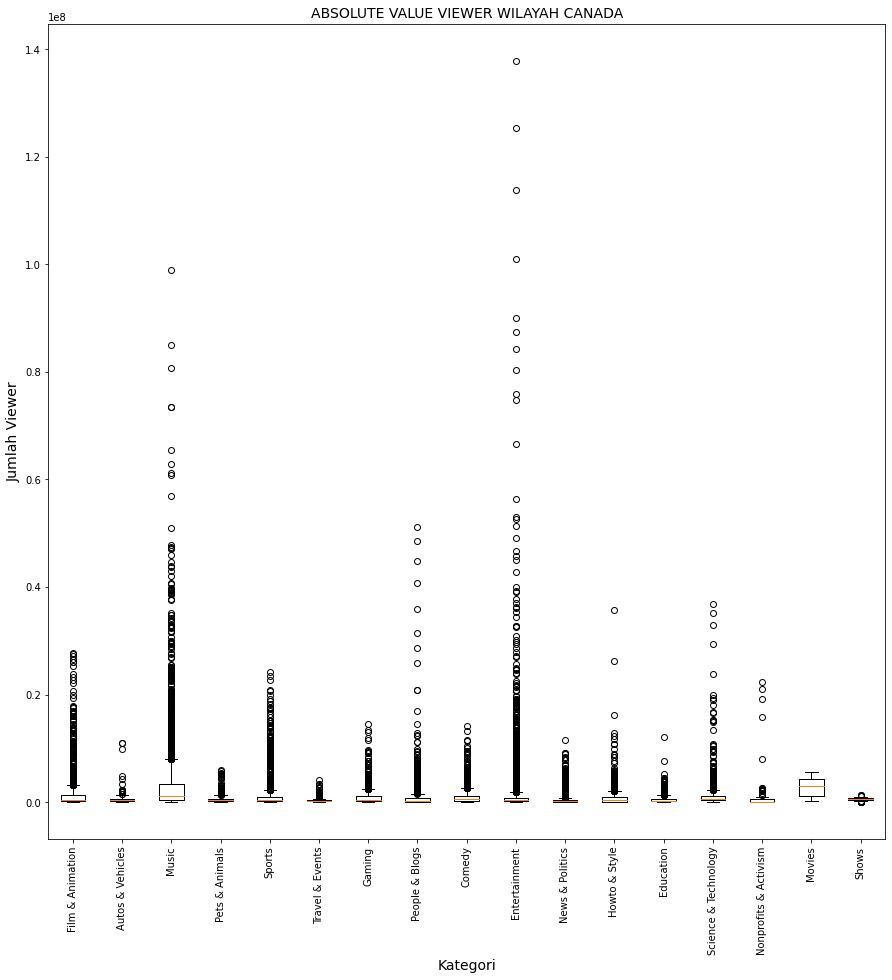

In [59]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_view_ca_boxplot)

# penamaan x tick berdasarkan id kategori Canada
ax.set_xticklabels(dfCAcategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE VIEWER WILAYAH CANADA", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

Karena setelah dilakukan boxplotting outlier terlihat terlalu banyak maka diputuskan untuk dicoba dilakukan outlier removal dengan metode z-score dan IQR pada salah satu kategori yaitu Entertainment yang mana ada di urutan 9 pada array a.

#### Testing Z-Score Viewer Salah Satu Kategori Video Canada Yaitu Entertainment

In [60]:
data_view_ca_boxplot = {
    
    # id kategori
    'id' : [items for items in dfCAcategory['id']],
    # nama kategori
    'category':[items for items in dfCAcategory['category']],
    #penonton tertinggi
    'viewer':[gCAvideo.get_group(items)['views'].values for items in dfCAcategory['id']],
    'median':[statistics.median(gCAvideo.get_group(items)['views'].values) for items in dfCAcategory['id']]
    
}

dfViewCAboxplot= pd.DataFrame(data_view_ca_boxplot)

# sort by median
dfViewCAboxplot = dfViewCAboxplot.sort_values(by="median",ascending=False).reset_index(drop=True)

dfViewCAboxplot

,id,category,viewer,median
0,30,Movies,"[225528, 781977, 2289027, 3523444, 4638549, 56...",2906235.500000
1,10,Music,"[17158579, 33523622, 5068229, 5718766, 178447,...",1216670.000000
2,28,Science & Technology,"[817732, 786155, 119180, 2742984, 27910, 18364...",617192.000000
3,23,Comedy,"[1014651, 3191434, 2987945, 557883, 524623, 36...",583684.000000
4,43,Shows,"[591632, 437979, 467088, 416189, 487929, 41323...",565155.500000
5,1,Film & Animation,"[158815, 308568, 1096327, 458964, 2736733, 264...",460852.000000
6,20,Gaming,"[925222, 191353, 274190, 1788176, 282743, 3756...",411583.000000
7,2,Autos & Vehicles,"[116820, 374640, 19646, 214480, 37857, 166458,...",391515.000000
8,17,Sports,"[36311, 28992, 788935, 33167, 439507, 166818, ...",390040.000000
9,24,Entertainment,"[2095828, 4477587, 960747, 1496225, 343168, 54...",346166.000000


In [61]:
data_ent_ca_view = {
    'viewer' : dfViewCAboxplot.loc[9, 'viewer'],
    'z-score' : stats.zscore(dfViewCAboxplot.loc[9, 'viewer'])
}

dfEntertainViewTest = pd.DataFrame(data_ent_ca_view)

In [62]:
# Membuat Dataframe Baru yang telah difilter tanpa outlier
dfEntertainViewTestz = dfEntertainViewTest[dfEntertainViewTest['z-score'] < 3]

dfEntertainViewTestz

,viewer,z-score
0,2095828,0.291247
1,4477587,0.933867
2,960747,-0.015008
3,1496225,0.129469
4,343168,-0.181636
...,...,...
13446,774509,-0.065257
13447,201847,-0.219766
13448,80685,-0.252457
13449,103339,-0.246344


Text(0, 0.5, 'Jumlah Views')

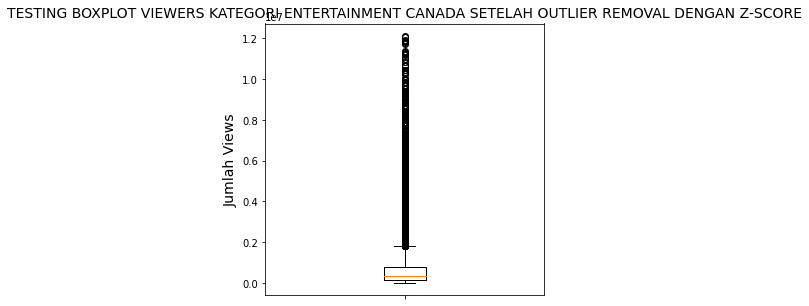

In [63]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfEntertainViewTestz['viewer'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("TESTING BOXPLOT VIEWERS KATEGORI ENTERTAINMENT CANADA SETELAH OUTLIER REMOVAL DENGAN Z-SCORE", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Setelah dilakukan outlier removal dengan Z-Score masih terlihat bahwa outlier dianggap masih terlalu banyak hingga sulit untuk dibaca, maka diputuskan untuk mencoba dilakukan outlier removal dengan IQR

Step untuk mendeteksi outlier salah satunya adalah dengan menemukan range bawah dan atas dari suatu data dengan cara berikut :
1. Mengurutkan data dari nilai terendah
2. Menghitung Q1 (kuartil 1)
3. Menghitung Q3 (kuartil 3)
4. Menghitung IQR = (Q3 - Q1)
5. Menemukan range bawah data = Q1 -(1.5 * IQR)
6. Menemukan range atas data = Q3 + (1.5 * IQR)

In [64]:
Q1_test_ent_CA = dfEntertainViewTest.viewer.quantile(0.25)
Q3_test_ent_CA = dfEntertainViewTest.viewer.quantile(0.75)
IQR_test_ent_CA = Q3_test_ent_CA - Q1_test_ent_CA
lower_test_ent_CA = Q1_test_ent_CA  - (1.5 * IQR_test_ent_CA)
upper_test_ent_CA =  Q3_test_ent_CA + (1.5 * IQR_test_ent_CA)

print("IQR Ent Canada")
print("IQR =", IQR_test_ent_CA)
print("Lower =", lower_test_ent_CA)
print("Upper =", upper_test_ent_CA)

IQR Ent Canada
IQR = 679164.0
Lower = -872197.5
Upper = 1844458.5


In [65]:
dfEntertainViewTest_IQRView = dfEntertainViewTest[(dfEntertainViewTest.viewer < upper_test_ent_CA) & (dfEntertainViewTest.viewer > lower_test_ent_CA)]

Text(0, 0.5, 'Jumlah Views')

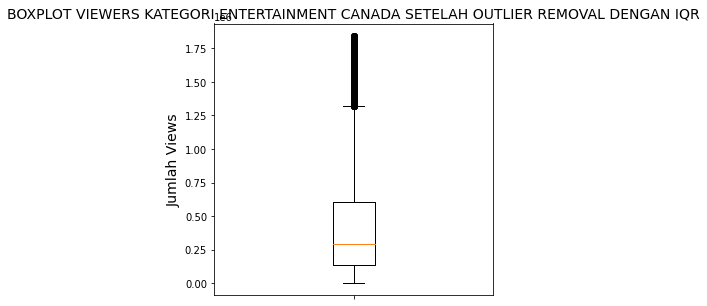

In [66]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfEntertainViewTest_IQRView['viewer'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS KATEGORI ENTERTAINMENT CANADA SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Setelah dilakukan outlier removal dengan IQR masih terlihat bahwa outlier masih cukup sulit untuk dibaca, di sini akhirnya diputuskan untuk <b>menampilkan boxplot tanpa outlier</b>.

Text(0, 0.5, 'Jumlah Viewer')

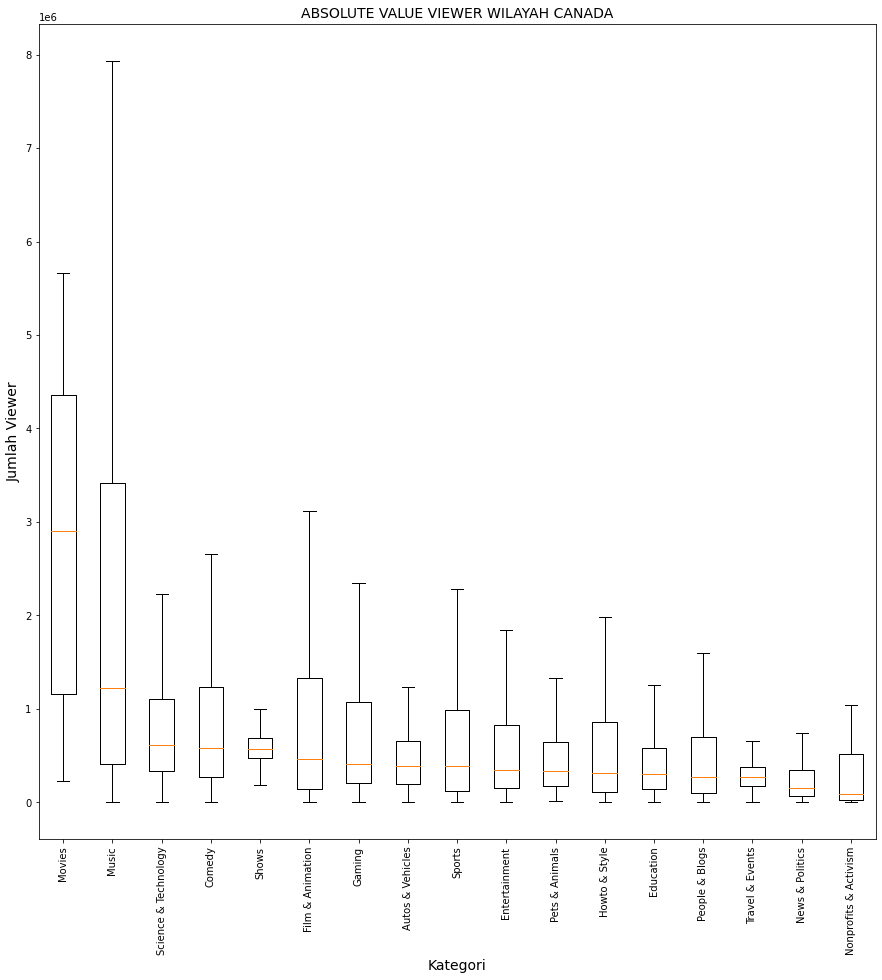

In [67]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfViewCAboxplot['viewer'], showfliers=False)

# penamaan x tick berdasarkan id kategori Canada
ax.set_xticklabels(dfViewCAboxplot['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE VIEWER WILAYAH CANADA", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 2B. Boxplotting Absolute Value Likes Berdasarkan Kategori Data Video Canada

In [68]:
# membuat dataframe absolute value likes+median
data_likes_ca_boxplot = {
    
    # id kategori
    'id' : [items for items in dfCAcategory['id']],
    # nama kategori
    'category':[items for items in dfCAcategory['category']],
    #penonton tertinggi
    'likes':[gCAvideo.get_group(items)['likes'].values for items in dfCAcategory['id']],
    #median
    'median':[statistics.median(gCAvideo.get_group(items)['likes'].values) for items in dfCAcategory['id']]
}

dfLikesCAboxplot= pd.DataFrame(data_likes_ca_boxplot)

# sort by median
dfLikesCAboxplot = dfLikesCAboxplot.sort_values(by="median",ascending=False).reset_index(drop=True)


Text(0, 0.5, 'Jumlah Viewer')

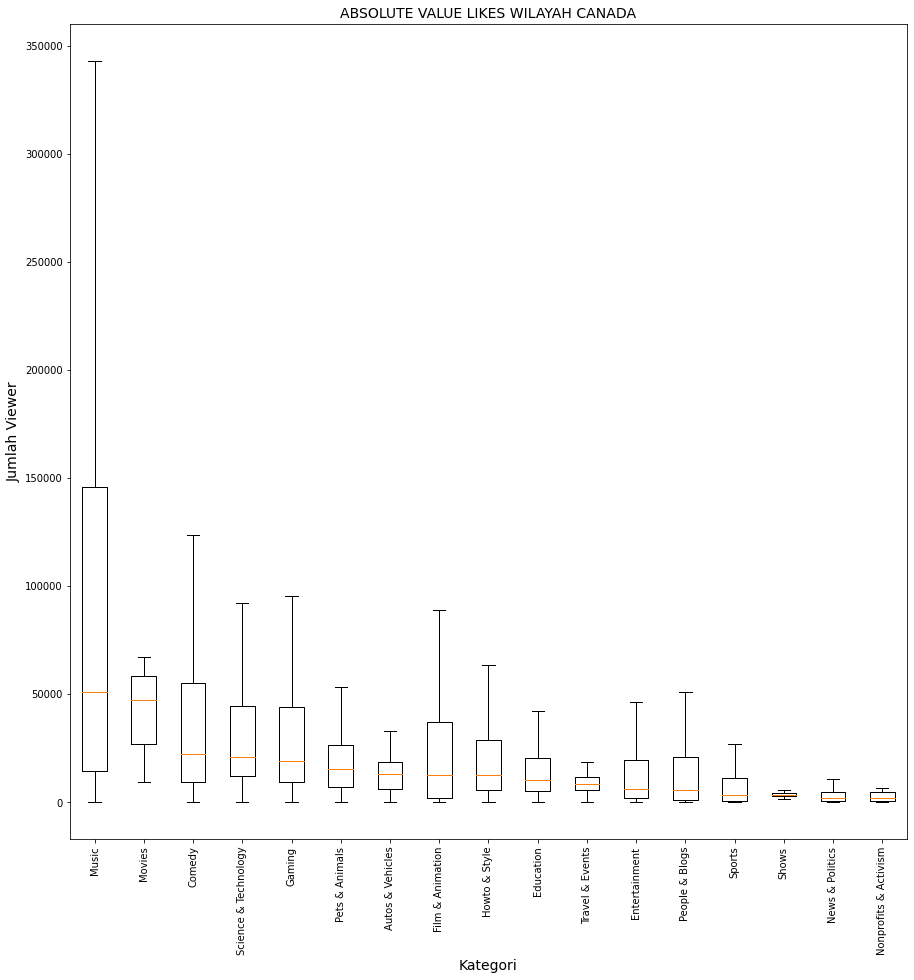

In [69]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfLikesCAboxplot['likes'], showfliers=False)

# penamaan x tick berdasarkan id kategori Canada
ax.set_xticklabels(dfLikesCAboxplot['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE LIKES WILAYAH CANADA", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

Text(0, 0.5, 'Jumlah Viewer')

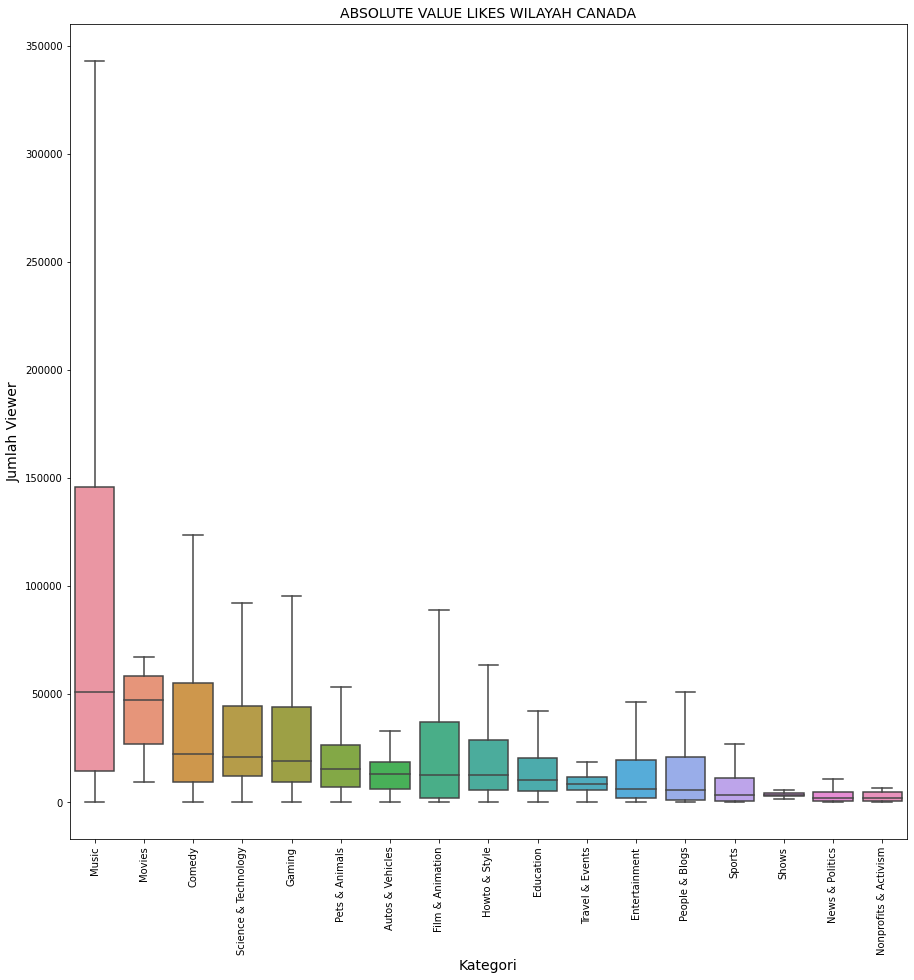

In [70]:
fig = plt.figure(1, figsize=(15, 15))

ax = sns.boxplot(data = dfLikesCAboxplot['likes'], showfliers = False)

ax.set_xticklabels(dfLikesCAboxplot['category'], rotation='vertical')

# penamaan x tick berdasarkan id kategori Canada
ax.set_xticklabels(dfLikesCAboxplot['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE LIKES WILAYAH CANADA", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 3B. Boxplotting Absolute Value Dislikes Berdasarkan Kategori Data Video Canada

In [71]:
# membuat dataframe absolute value dislikes+median
data_dislikes_ca_boxplot = {
    
    # id kategori
    'id' : [items for items in dfCAcategory['id']],
    # nama kategori
    'category':[items for items in dfCAcategory['category']],
    #penonton tertinggi
    'dislikes':[gCAvideo.get_group(items)['dislikes'].values for items in dfCAcategory['id']],
    #median
    'median':[statistics.median(gCAvideo.get_group(items)['dislikes'].values) for items in dfCAcategory['id']]
}

dfDislikesCAboxplot= pd.DataFrame(data_dislikes_ca_boxplot)

# sort by median
dfDislikesCAboxplot = dfDislikesCAboxplot.sort_values(by="median",ascending=False).reset_index(drop=True)

Text(0, 0.5, 'Jumlah Dislikes')

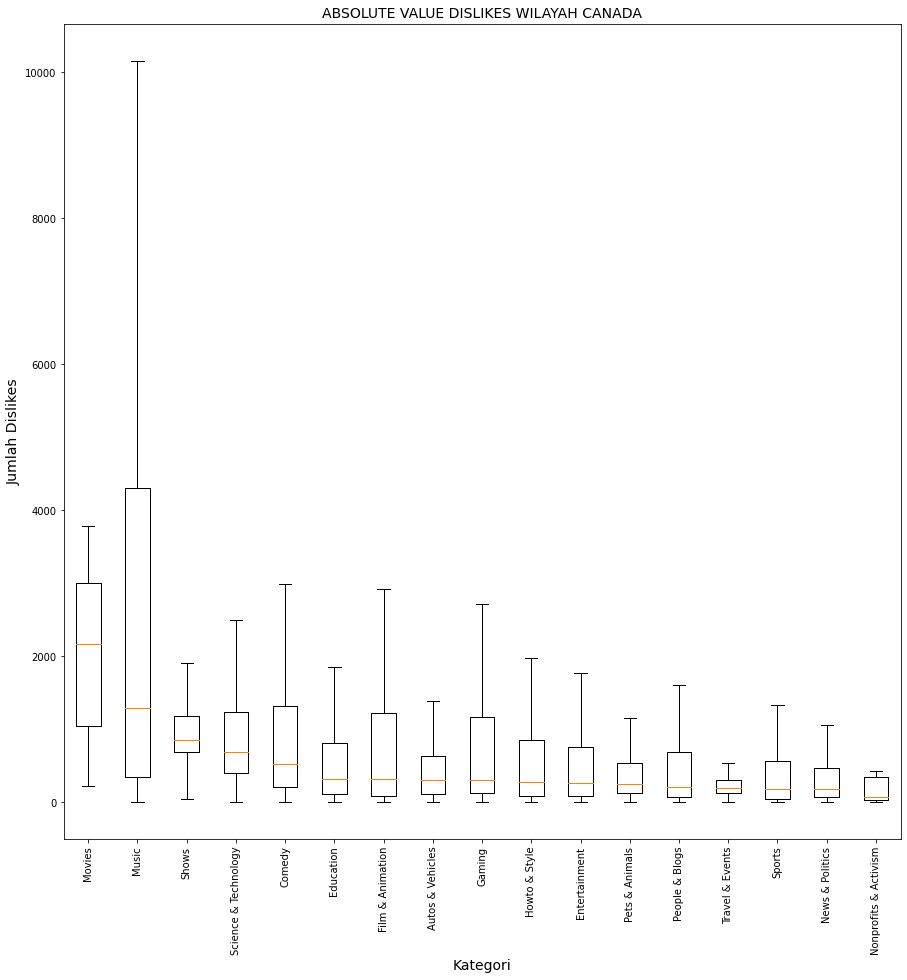

In [72]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfDislikesCAboxplot['dislikes'], showfliers=False)

# penamaan x tick berdasarkan id kategori Canada
ax.set_xticklabels(dfDislikesCAboxplot['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE DISLIKES WILAYAH CANADA", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Dislikes", fontsize=14)

### 4B. Boxplotting Absolute Value Jumlah Komentar Berdasarkan Kategori Data Video Canada

In [73]:
# membuat dataframe absolute value comments+median
data_comments_ca_boxplot = {
    
    # id kategori
    'id' : [items for items in dfCAcategory['id']],
    # nama kategori
    'category':[items for items in dfCAcategory['category']],
    #penonton tertinggi
    'comments':[gCAvideo.get_group(items)['comment_count'].values for items in dfCAcategory['id']],
    #median
    'median':[statistics.median(gCAvideo.get_group(items)['comment_count'].values) for items in dfCAcategory['id']]
}

dfCommentsCAboxplot= pd.DataFrame(data_comments_ca_boxplot)

# sort by median
dfCommentsCAboxplot = dfCommentsCAboxplot.sort_values(by="median",ascending=False).reset_index(drop=True)


Text(0, 0.5, 'Jumlah Komentar')

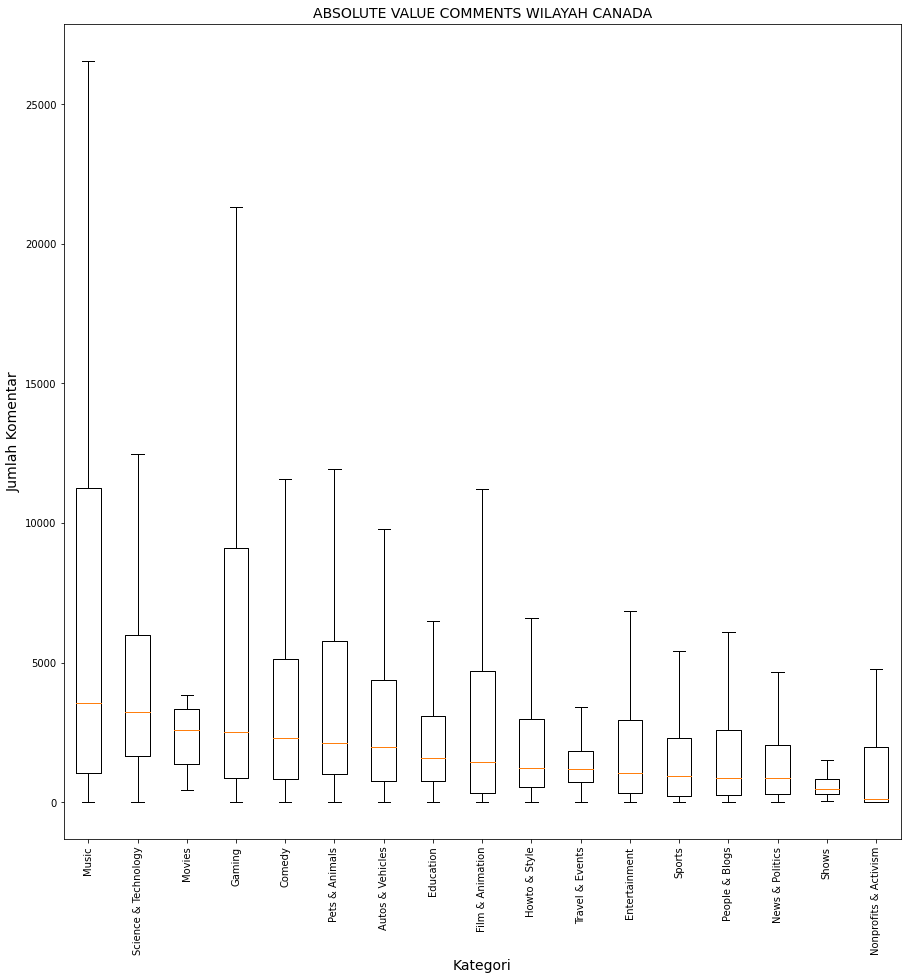

In [74]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfCommentsCAboxplot['comments'], showfliers=False)

# penamaan x tick berdasarkan id kategori Canada
ax.set_xticklabels(dfCommentsCAboxplot['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE COMMENTS WILAYAH CANADA", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Komentar", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## C. BOXPLOTTING RELATIVE VALUE BERDASARKAN KATEGORI DATA VIDEO CANADA
Karena melakukan boxplotting terhadap absolute value untuk jumlah views, likes, dislikes, dan comments tidak dapat dilihat dengan baik karena data terlalu diverse. Maka diputuskan untuk melakukan boxplotting likes, dislikes, dan comments terhadap views untuk setiap video kemudian dikalikan 100 agar range value terjaga mulai dari 0 hingga 100.


<b>Operasinya adalah sebagai sebagai berikut :<br/>
- Jumlah Likes / Jumlah Views * 100<br/>
- Jumlah Dislikes / Jumlah Views * 100<br/>
- Jumlah Comments / Jumlah Views * 100<br/></b>

Untuk itu maka dataframe video perlu dimodifikasi dengan menghapus kolom yang tidak diperlukan dan menambahkan kolom baru dari setiap operasi yang dilakukan

In [75]:
# drop kolom yang tidak perlu
dfCA = dfCAvideos.drop([
    'trending_date','channel_title','publish_time','tags','thumbnail_link','comments_disabled','ratings_disabled',
  'video_error_or_removed','description'], axis=1)

In [76]:
# Menambah kolom likes/views
dfCA['likes/views(%)'] = dfCA['likes']/dfCA['views']*100

In [77]:
# Menambah kolom dislikes/views
dfCA['dislikes/views(%)'] = dfCA['dislikes']/dfCA['views']*100

In [78]:
# Menambah kolom comments/views
dfCA['comments/views(%)'] = dfCA['comment_count']/dfCA['views']*100

Berikut adalah data video Canada setelah dimodifikasi. Dataframe ditambah kolom sebagai berikut :
<b>
- likes/views
- dislikes/views
- comments/views
</b>
semua dalam persen (%)

In [79]:
dfCA.head()

,video_id,title,category_id,views,likes,dislikes,comment_count,likes/views(%),dislikes/views(%),comments/views(%)
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. Beyoncé,10,17158579,787425,43420,125882,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,23,1014651,127794,1688,13030,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",23,3191434,146035,5339,8181,4.575843,0.167292,0.256342
3,d380meD0W0M,I Dare You: GOING BALD!?,24,2095828,132239,1989,17518,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),10,33523622,1634130,21082,85067,4.874563,0.062887,0.253752


Karena data video telah dimodifikasi, maka pengelompokan ulang berdasarkan id kategori perlu dilakukan kembali

In [80]:
gCAvideo = dfCA.groupby('category_id')

In [81]:
data_relative_views_ca = {
    
    'id' : [items for items in dfCAcategory['id']],
    'category' : [items for items in dfCAcategory['category']],
    'likes/views(%)': [gCAvideo.get_group(items)['likes/views(%)'].values for items in dfCAcategory['id']],
    'dislikes/views(%)': [gCAvideo.get_group(items)['dislikes/views(%)'].values for items in dfCAcategory['id']],
    'comments/views(%)': [gCAvideo.get_group(items)['comments/views(%)'].values for items in dfCAcategory['id']],
    'median_likes/views(%)': [statistics.median(gCAvideo.get_group(items)['likes/views(%)'].values) for items in dfCAcategory['id']],
    'median_dislikes/views(%)': [statistics.median(gCAvideo.get_group(items)['dislikes/views(%)'].values) for items in dfCAcategory['id']],
    'median_comments/views(%)': [statistics.median(gCAvideo.get_group(items)['comments/views(%)'].values) for items in dfCAcategory['id']]
}

dfRelativeViewsCA = pd.DataFrame(data_relative_views_ca)
dfRelativeViewsCA

,id,category,likes/views(%),dislikes/views(%),comments/views(%),median_likes/views(%),median_dislikes/views(%),median_comments/views(%)
0,1,Film & Animation,"[0.13726663098573813, 6.332801845946437, 3.098...","[0.01888990334666121, 0.022685437245599026, 0....","[0.11711740074929951, 0.1604184490938788, 0.08...",2.243940,0.068356,0.299080
1,2,Autos & Vehicles,"[1.2865947611710324, 4.631379457612642, 0.8093...","[0.11898647491867831, 0.1150437753576767, 0.07...","[0.9125149803115904, 0.9595878710228486, 0.269...",2.945110,0.083982,0.609486
2,10,Music,"[4.589103794667379, 4.874562778449178, 5.20094...","[0.25305125791593813, 0.06288699950142619, 0.1...","[0.733638840372504, 0.25375241374574625, 0.571...",4.090068,0.100387,0.320457
3,15,Pets & Animals,"[3.6008904650849027, 6.338500374709108, 4.6541...","[0.11853593662664072, 0.08480258746499428, 0.1...","[1.0215292099531639, 4.006757911621241, 1.5968...",4.121532,0.069794,0.624534
4,17,Sports,"[0.7628542315000963, 4.859961368653422, 1.9691...","[0.07711161906860181, 0.031043046357615896, 0....","[0.035801823138993695, 0.6484547461368654, 0.3...",0.897488,0.047586,0.255886
5,19,Travel & Events,"[2.761384804711356, 1.1767789837617253, 3.7846...","[0.05677441530024459, 0.04959333465582226, 0.1...","[0.3903624662806006, 0.1672003854110579, 0.559...",3.266420,0.078154,0.463651
6,20,Gaming,"[9.188713627648283, 1.7282195732494394, 2.2987...","[0.05944519261323228, 0.044420521235622124, 0....","[0.4650775705722519, 0.27906539223320254, 0.13...",4.755097,0.076412,0.618207
7,22,People & Blogs,"[7.687867296298374, 0.8185509174302845, 3.5240...","[0.3964595242485709, 0.19320573045029207, 0.11...","[2.1324899047802304, 0.29376772949614083, 0.27...",2.135197,0.077128,0.348513
8,23,Comedy,"[12.594872522670356, 4.575842708951525, 6.2740...","[0.16636262123626744, 0.1672915686177436, 0.32...","[1.2841853997088655, 0.2563424466869752, 0.891...",4.639312,0.086969,0.384747
9,24,Entertainment,"[6.309630370431162, 6.540062761482915, 3.31096...","[0.09490282599526297, 0.0920808462236468, 0.06...","[0.8358510335771828, 0.8127368602776451, 0.555...",1.821502,0.072549,0.289712


### 1C. Boxplotting Relative Value Likes/Views Data Video Canada

#### Berikut adalah hasil boxplot jumlah likes terhadap jumlah views di Canada

Text(0, 0.5, 'LIKES/VIEWS')

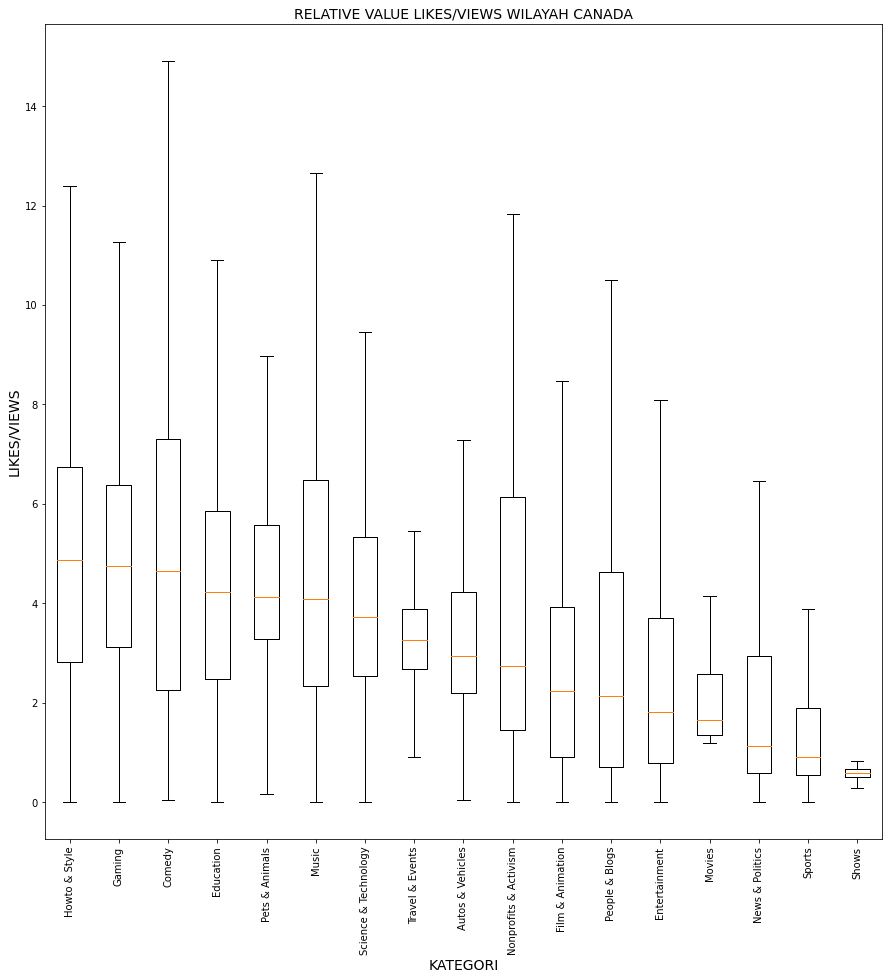

In [82]:
# sorting
dfRelativeViewsCA_sortLikes = dfRelativeViewsCA.sort_values(by="median_likes/views(%)",ascending=False)

fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfRelativeViewsCA_sortLikes['likes/views(%)'].values, showfliers=False)

# penamaan x tick
ax.set_xticklabels(dfRelativeViewsCA_sortLikes['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE LIKES/VIEWS WILAYAH CANADA", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("LIKES/VIEWS", fontsize=14)

### 2C. Boxplotting Relative Value Dislikes/Views Data Video Canada

#### Berikut adalah hasil boxplot jumlah dislikes terhadap jumlah views di Canada

Text(0, 0.5, 'DISLIKES/VIEWS')

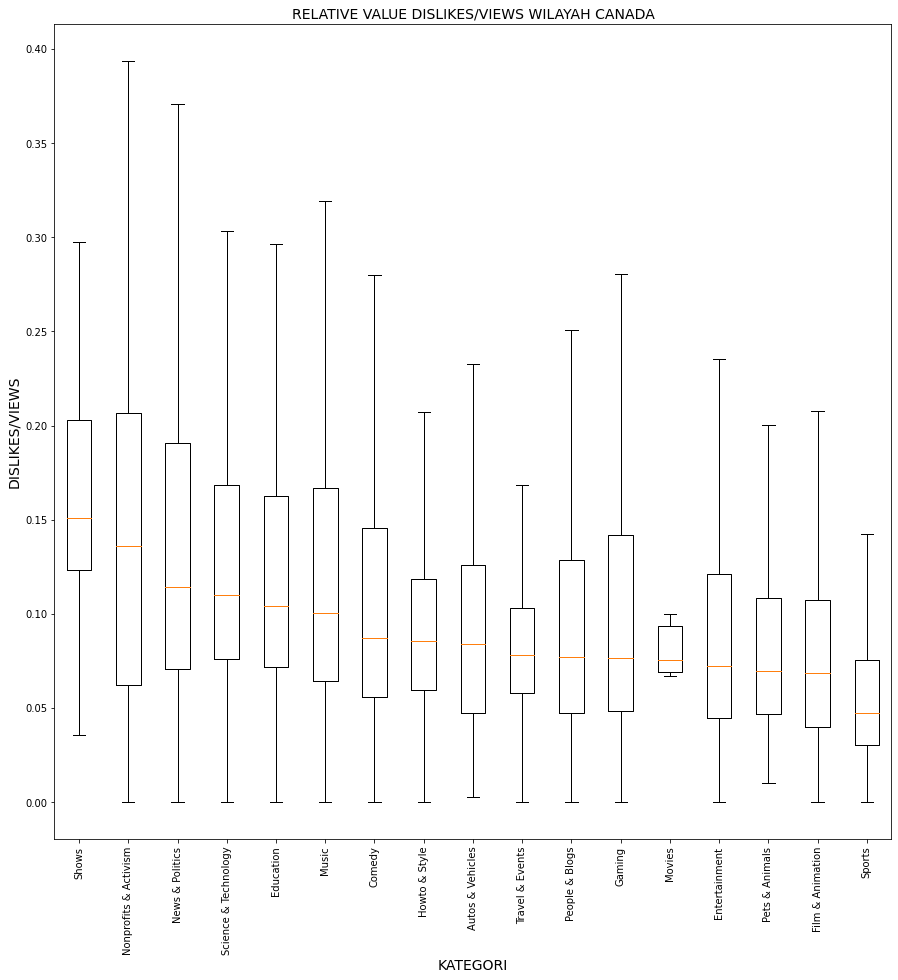

In [83]:
# sorting
dfRelativeViewsCA_sortDislikes = dfRelativeViewsCA.sort_values(by="median_dislikes/views(%)",ascending=False)

fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfRelativeViewsCA_sortDislikes['dislikes/views(%)'].values, showfliers=False)

# penamaan x tick
ax.set_xticklabels(dfRelativeViewsCA_sortDislikes['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE DISLIKES/VIEWS WILAYAH CANADA", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("DISLIKES/VIEWS", fontsize=14)

Text(0, 0.5, 'COMMENTS/VIEWS')

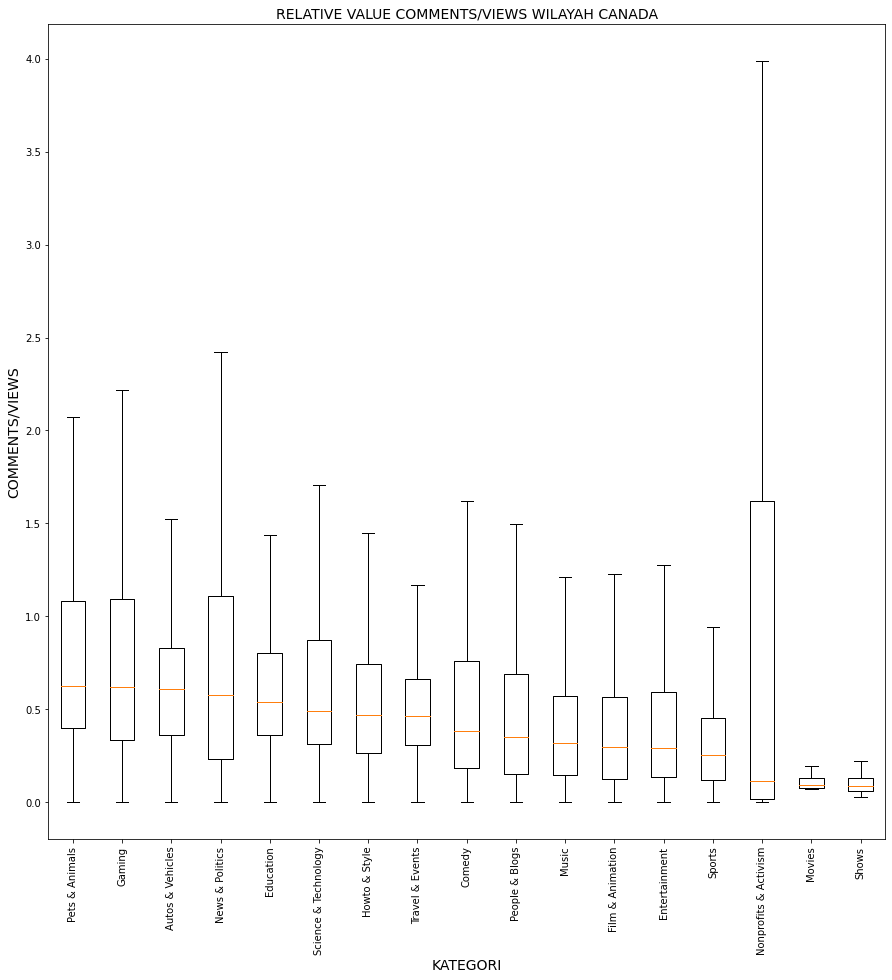

In [84]:
# sorting
dfRelativeViewsCA_sortComments = dfRelativeViewsCA.sort_values(by="median_comments/views(%)",ascending=False)

fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfRelativeViewsCA_sortComments['comments/views(%)'].values, showfliers=False)

# penamaan x tick
ax.set_xticklabels(dfRelativeViewsCA_sortComments['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE COMMENTS/VIEWS WILAYAH CANADA", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("COMMENTS/VIEWS", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></b>

## MENCARI PENYEBAB FIRST TRENDING DI CANADA

Di sini masing-masing datasets dari setiap region ditransform ulang dengan hanya mencantumkan data video pada saat pertama kali video tersebut mengalami trend

Dataframe baru dibuat dari masing-masing datasets dengan <b>grouping by video_id</b> lalu digunakan <b>loc</b> untuk melokasikan data berdasarkan index, lalu yang dicari adalah trending_date pertama kali, <b>maka dicari index terkecil dari masing-masing video_id berdasarkan trending_datenya dengan menggunakan idxmin()</b>

In [85]:
dfCAvideosFirstTrend = dfCAvideos.loc[dfCAvideos.groupby('video_id')['trending_date'].idxmin()][['video_id','trending_date','title','channel_title','category_id','publish_time','tags','views','likes','dislikes','comment_count']]

### Sorting

Dilakukan reindex untuk masing-masing dataframe berdasarkan video_id dan trending_date nya

In [86]:
dfCAvideosFirstTrend = dfCAvideosFirstTrend.sort_values(by=['video_id','trending_date']).reset_index(drop=True)

#### DATA VIDEO FIRST TREND CANADA

Berikut adalah contoh dataframe video Canada setelah dimodifikasi dengan hanya menampilkan data-data video saat pertama kali masuk trending

In [87]:
dfCAvideosFirstTrend.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,--45ws7CEN0,2018-06-12,PlayStation E3 2018 Showcase | English,PlayStation Europe,20,2018-06-12T03:11:18.000Z,"playstation|""playstation 4""|""playstation europ...",309197,3837,516,278
1,--7vNbh4UNA,2018-04-14,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,25,2018-04-13T19:00:00.000Z,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...",1082647,52114,1284,10602
2,--MtKsH5oBY,2018-06-01,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,RedsTech,17,2018-05-31T12:40:46.000Z,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",511042,3517,372,767
3,--YgtVuvWGo,2018-05-20,Jessie Reyez - Body Count,JessieReyezVEVO,10,2018-05-18T04:00:00.000Z,"Jessie|""Reyez""|""Body""|""Count""|""Island""|""Records""",362391,21547,356,955
4,--iJShLChIc,2018-05-01,Undisputed | Will LeBron James carry the Cavs ...,THSports 2,17,2018-04-30T16:02:26.000Z,[none],54691,153,134,254


### Boxplotting Viewer Data Video First Trend Canada

Text(0, 0.5, 'Jumlah Views')

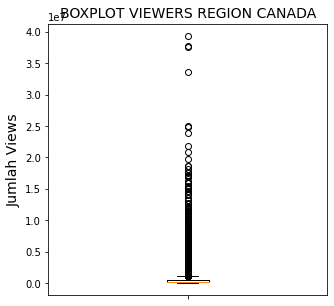

In [88]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfCAvideosFirstTrend['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION CANADA", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## Testing Z-Score Viewer Data Video First Trend Canada

In [89]:
# Membuat Kolom Z-Score Untuk Viewer
dfCAvideosFirstTrend['views_zscore'] = (dfCAvideosFirstTrend.views - dfCAvideosFirstTrend.views.mean())/dfCAvideosFirstTrend.views.std(ddof=0)

# Membuat Dataframe Baru yang telah difilter tanpa outlier
dfCAvideosFirstTrend_zView = dfCAvideosFirstTrend[dfCAvideosFirstTrend.views_zscore < 3]

dfCAvideosFirstTrend_zView

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,views_zscore
0,--45ws7CEN0,2018-06-12,PlayStation E3 2018 Showcase | English,PlayStation Europe,20,2018-06-12T03:11:18.000Z,"playstation|""playstation 4""|""playstation europ...",309197,3837,516,278,-0.158711
1,--7vNbh4UNA,2018-04-14,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,25,2018-04-13T19:00:00.000Z,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...",1082647,52114,1284,10602,0.535388
2,--MtKsH5oBY,2018-06-01,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,RedsTech,17,2018-05-31T12:40:46.000Z,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",511042,3517,372,767,0.022426
3,--YgtVuvWGo,2018-05-20,Jessie Reyez - Body Count,JessieReyezVEVO,10,2018-05-18T04:00:00.000Z,"Jessie|""Reyez""|""Body""|""Count""|""Island""|""Records""",362391,21547,356,955,-0.110974
4,--iJShLChIc,2018-05-01,Undisputed | Will LeBron James carry the Cavs ...,THSports 2,17,2018-04-30T16:02:26.000Z,[none],54691,153,134,254,-0.387106
...,...,...,...,...,...,...,...,...,...,...,...,...
24422,zz2vrPorALM,2018-04-23,Most Hilarious Tweets Of 2018,Reaction Time,24,2018-04-22T19:15:01.000Z,"reaction time|""reaction""|""time""|""reactiontime""...",215621,11897,139,1526,-0.242686
24423,zzCQbYn4U74,2018-03-08,James Corden Challenges LAFC To Soccer Match,The Late Late Show with James Corden,24,2018-03-07T06:52:43.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",387442,7771,205,450,-0.088493
24424,zzO3J_pp9vc,2018-05-09,Parada (Full Song) Jass Manak Ft. Byg Byrd | N...,Akash Paul,10,2018-05-07T16:46:51.000Z,[none],69142,2957,35,177,-0.374137
24425,zzVFyVNgtsc,2018-05-04,Our World in 2018: DISTURBING VIDEO!,Jason A,25,2018-05-04T01:00:20.000Z,"jason a|""news""|""2018""",51768,2537,98,1409,-0.389729


Text(0, 0.5, 'Jumlah Views')

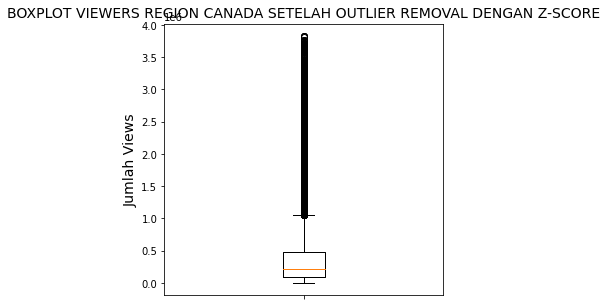

In [90]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfCAvideosFirstTrend_zView['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION CANADA SETELAH OUTLIER REMOVAL DENGAN Z-SCORE", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## Testing IQR Viewer Data Video First Trend Canada
Step untuk mendeteksi outlier salah satunya adalah dengan menemukan range bawah dan atas dari suatu data dengan cara berikut :
1. Mengurutkan data dari nilai terendah
2. Menghitung Q1 (kuartil 1)
3. Menghitung Q3 (kuartil 3)
4. Menghitung IQR = (Q3 - Q1)
5. Menemukan range bawah data = Q1 -(1.5 * IQR)
6. Menemukan range atas data = Q3 + (1.5 * IQR)

1. Mengurutkan data dari yang terendah

In [91]:
dfCAvideosFirstTrendSortViews = dfCAvideosFirstTrend.sort_values(by=['views'])

2. Menghitung Q1 (kuartil 1)

In [92]:
Q1_CAFirstTrendView = dfCAvideosFirstTrendSortViews.views.quantile(0.25)

3. Menghitung Q3 (kuartil 3)

In [93]:
Q3_CAFirstTrendView = dfCAvideosFirstTrendSortViews.views.quantile(0.75)

4. Menghitung IQR = (Q3 - Q1)

In [94]:
IQR_CAFirstTrendView = Q3_CAFirstTrendView - Q1_CAFirstTrendView

5. Menemukan range bawah data = Q1 -(1.5 * IQR)

In [95]:
lower_CAFirstTrendView = Q1_CAFirstTrendView - (1.5 * IQR_CAFirstTrendView)

6. Menemukan range atas data = Q3 + (1.5 * IQR)

In [96]:
upper_CAFirstTrendView =  Q3_CAFirstTrendView + (1.5 * IQR_CAFirstTrendView)

<b>Berikut adalah hasil perhitungan yang telah dilakukan di atas</b>

In [97]:
print("IQR Canada")
print("IQR =", IQR_CAFirstTrendView)
print("Lower =", lower_CAFirstTrendView)
print("Upper =", upper_CAFirstTrendView)

IQR Canada
IQR = 397652.5
Lower = -501248.75
Upper = 1089361.25


In [98]:
dfCAvideosFirstTrend_IQRView = dfCAvideosFirstTrendSortViews[(dfCAvideosFirstTrendSortViews.views < upper_CAFirstTrendView) & (dfCAvideosFirstTrendSortViews.views > lower_CAFirstTrendView)]

Text(0, 0.5, 'Jumlah Views')

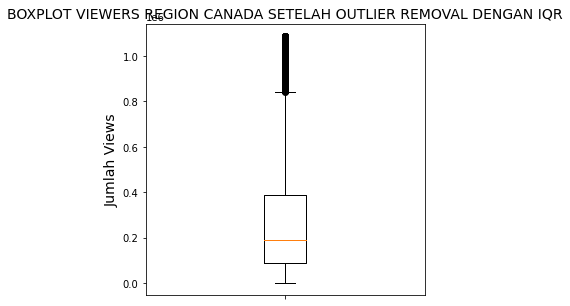

In [99]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfCAvideosFirstTrend_IQRView['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION CANADA SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Di sini coba dilakukan boxplotting tanpa menampilkan outlier

Text(0, 0.5, 'Jumlah Views')

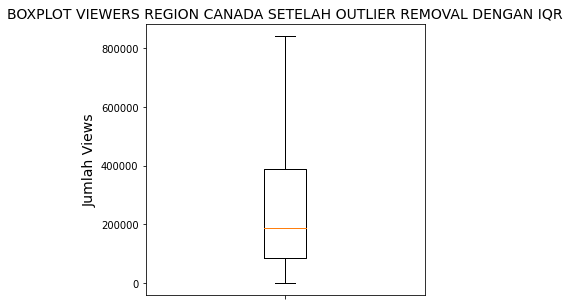

In [100]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfCAvideosFirstTrend_IQRView['views'].values, showfliers=False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION CANADA SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Text(0, 0.5, 'Jumlah Views')

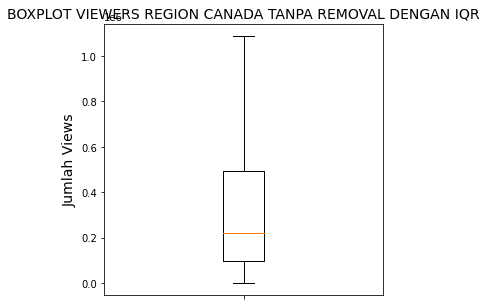

In [101]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfCAvideosFirstTrend['views'].values, showfliers=False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION CANADA TANPA REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## STATISTIK DARI SETIAP KATEGORI YANG TERDAPAT DI DATAFRAME FIRST TREND VIDEO CANADA

In [102]:
# mengelompokan ulang dataframe videosFirstTrend berdasarkan id kategori
gCAVideoFtrend = dfCAvideosFirstTrend.groupby('category_id')

Membuat dataframe baru yang memiliki kolom id, category yang diambil dari dfCAcategory, dan views yang diambil dari hasil pengelompokkan berdasarkan category_id

In [103]:
data_ftrend_views_ca = {
    
    'id' : [items for items in dfCAcategory['id']],
    'category' : [items for items in dfCAcategory['category']],
    'views': [gCAVideoFtrend.get_group(items)['views'].values for items in dfCAcategory['id']],
    'median_views': [statistics.median(gCAVideoFtrend.get_group(items)['views'].values) for items in dfCAcategory['id']]
}

dfFtrendViewsCA = pd.DataFrame(data_ftrend_views_ca)
dfFtrendViewsCA

,id,category,views,median_views
0,1,Film & Animation,"[342238, 321826, 98540, 404274, 42482, 1045258...",198065.000000
1,2,Autos & Vehicles,"[706350, 462474, 277998, 310539, 510470, 5879,...",296368.500000
2,10,Music,"[362391, 410690, 341665, 8384, 371306, 950417,...",486960.500000
3,15,Pets & Animals,"[908989, 223604, 375923, 294098, 227584, 16323...",194181.000000
4,17,Sports,"[511042, 54691, 504279, 509656, 1650461, 10508...",289203.000000
5,19,Travel & Events,"[317624, 258561, 127547, 264184, 282717, 18816...",192345.500000
6,20,Gaming,"[309197, 421374, 108654, 212112, 1330559, 1741...",257794.500000
7,22,People & Blogs,"[18467, 36887, 544748, 513127, 106827, 85830, ...",154675.000000
8,23,Comedy,"[1006049, 153229, 1986594, 518719, 745341, 157...",361708.500000
9,24,Entertainment,"[219401, 85782, 43056, 98160, 18484, 90340, 21...",218880.500000


Text(0, 0.5, 'VIEWS')

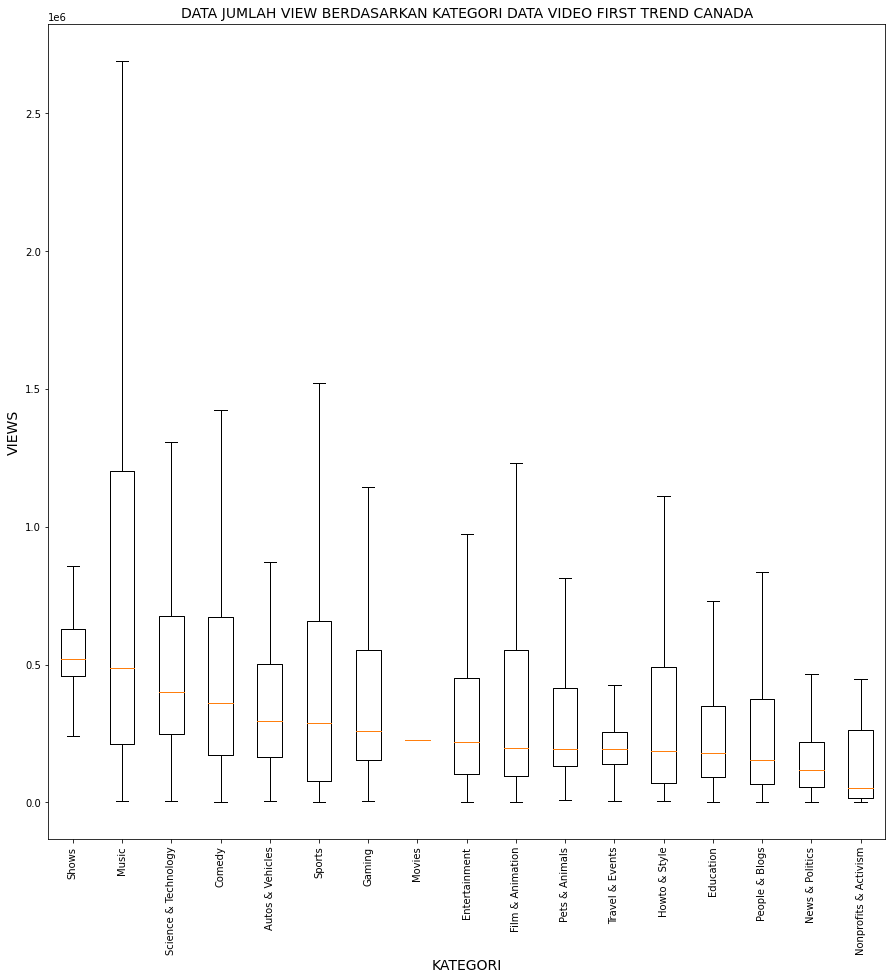

In [104]:
# sort
dfFtrendViewsCA_sort = dfFtrendViewsCA.sort_values(by="median_views",ascending=False)

fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfFtrendViewsCA_sort['views'].values, showfliers = False)

# penamaan x tick
ax.set_xticklabels(dfFtrendViewsCA_sort['category'], rotation='vertical')

# penamaan judul
plt.title("DATA JUMLAH VIEW BERDASARKAN KATEGORI DATA VIDEO FIRST TREND CANADA", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("VIEWS", fontsize=14)

##  D. BOXPLOTTING RELATIVE VALUE DATA VIDEO FIRST TREND CANADA
Karena melakukan boxplotting terhadap absolute value untuk jumlah views, likes, dislikes, dan comments tidak dapat dilihat dengan baik karena data terlalu diverse. Maka diputuskan untuk melakukan boxplotting likes, dislikes, dan comments terhadap views untuk setiap video kemudian dikalikan 100 agar range value terjaga mulai dari 0 hingga 100.

In [105]:
# Menambah kolom likes/views
dfCAvideosFirstTrend['likes/views(%)'] = dfCAvideosFirstTrend['likes']/dfCAvideosFirstTrend['views']*100

In [106]:
# Menambah kolom dislikes/views
dfCAvideosFirstTrend['dislikes/views(%)'] = dfCAvideosFirstTrend['dislikes']/dfCAvideosFirstTrend['views']*100

In [107]:
# Menambah kolom comments/views
dfCAvideosFirstTrend['comments/views(%)'] = dfCAvideosFirstTrend['comment_count']/dfCAvideosFirstTrend['views']*100

### 1D. Plotting Likes/Views % First Trend Canada

Text(0, 0.5, 'LIKES TERHADAP VIEWS')

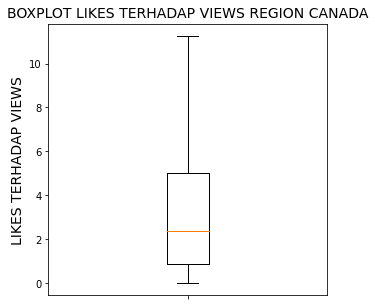

In [108]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfCAvideosFirstTrend['likes/views(%)'].values, showfliers = False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT LIKES TERHADAP VIEWS REGION CANADA", fontsize=14)

plt.ylabel("LIKES TERHADAP VIEWS", fontsize=14)

### 2D. Plotting Disikes/Views % First Trend Canada

Text(0, 0.5, 'DISLIKES TERHADAP VIEWS')

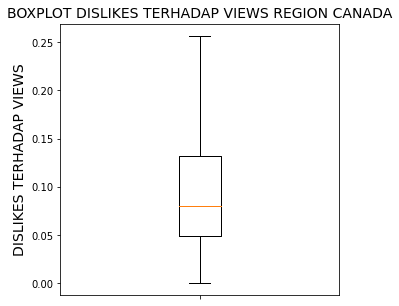

In [109]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfCAvideosFirstTrend['dislikes/views(%)'].values, showfliers = False)

#ax.set_ylim(0,100)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT DISLIKES TERHADAP VIEWS REGION CANADA", fontsize=14)

plt.ylabel("DISLIKES TERHADAP VIEWS", fontsize=14)

### 3D. Plotting Comments/Views % First Trend

Text(0, 0.5, 'COMMENTS TERHADAP VIEWS')

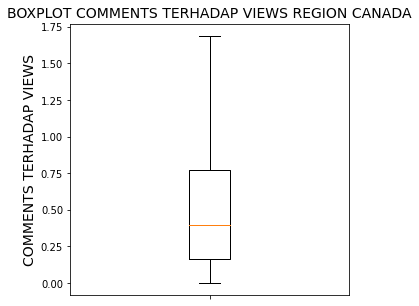

In [110]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfCAvideosFirstTrend['comments/views(%)'].values, showfliers = False)

#ax.set_ylim(0,100)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT COMMENTS TERHADAP VIEWS REGION CANADA", fontsize=14)

plt.ylabel("COMMENTS TERHADAP VIEWS", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## MENCARI MACAM-MACAM TOP 5

## TOP 5 KATEGORI VIDEO TERBANYAK YANG DIUPLOAD DI CANADA

Untuk mencari top 5 kategori video terbanyak dan terendah yang diupload berdasarkan masing-masing wilayah, maka dataframe baru yang menampilkan berapa banyak video yang diupload berdasarkan kategori perlu untuk dibuat.

In [115]:
data_upload_category_ca = {

    'id' : [items for items in dfCAcategory['id']],
    'category' : [items for items in dfCAcategory['category']],
    'upload_count': [gCAvideo.get_group(items)['category_id'].count() for items in dfCAcategory['id']]
}

dfCatUploadCA = pd.DataFrame(data_upload_category_ca)

print("DATA UPLOAD BERDASARKAN KATEGORI CANADA")
dfCatUploadCA

DATA UPLOAD BERDASARKAN KATEGORI CANADA


,id,category,upload_count
0,1,Film & Animation,2060
1,2,Autos & Vehicles,353
2,10,Music,3731
3,15,Pets & Animals,369
4,17,Sports,2787
5,19,Travel & Events,392
6,20,Gaming,1344
7,22,People & Blogs,4105
8,23,Comedy,3773
9,24,Entertainment,13451


### 1. Top 5 Kategori Dengan Upload Tertinggi Wilayah Canada

In [116]:
#sorting tertinggi
top5ca_upload_high = dfCatUploadCA.nlargest(5, "upload_count")

#reindex dari 1
top5ca_upload_high.index = np.arange(1, len(top5ca_upload_high) + 1)


print("TOP 5 KATEGORI DENGAN UPLOAD TERBANYAK DI CANADA")
top5ca_upload_high

TOP 5 KATEGORI DENGAN UPLOAD TERBANYAK DI CANADA


,id,category,upload_count
1,24,Entertainment,13451
2,25,News & Politics,4159
3,22,People & Blogs,4105
4,23,Comedy,3773
5,10,Music,3731


### 2. Top 5 Kategori Dengan Upload Terendah Wilayah Canada

In [117]:
#sorting terendah
top5ca_upload_low = dfCatUploadCA.sort_values('upload_count').head(5)

#reindex dari 1
top5ca_upload_low.index = np.arange(1, len(top5ca_upload_high) + 1)

print("TOP 5 KATEGORI DENGAN UPLOAD TERENDAH DI CANADA")
top5ca_upload_low

TOP 5 KATEGORI DENGAN UPLOAD TERENDAH DI CANADA


,id,category,upload_count
1,30,Movies,6
2,29,Nonprofits & Activism,74
3,43,Shows,124
4,2,Autos & Vehicles,353
5,15,Pets & Animals,369


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 KATEGORI BERDASARKAN AVERAGE VIEW DI CANADA

Untuk mencari top 5 kategori video tertinggi dan terendah berdasarkan average view untuk tiap wilayah wilayah, maka dataframe baru yang menampilkan berapa average view berdasarkan kategori perlu untuk dibuat.

In [118]:
data_avgview_category_ca = {

    'id' : [items for items in dfCAcategory['id']],
    'category' : [items for items in dfCAcategory['category']],
    'average_views': [gCAvideo.get_group(items)['views'].mean() for items in dfCAcategory['id']]
}

dfCatAvgViewCA = pd.DataFrame(data_avgview_category_ca)

### 1. Top 5 Kategori Dengan Average Views Tertinggi di Canada

In [119]:
#sorting tertinggi
top5ca_avgview_high = dfCatAvgViewCA.nlargest(5, "average_views")

#reindex dari 1
top5ca_avgview_high.index = np.arange(1, len(top5ca_avgview_high) + 1)

print("TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERTINGGI DI CANADA")
top5ca_avgview_high

TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERTINGGI DI CANADA


,id,category,average_views
1,10,Music,3532524.844278
2,30,Movies,2853415.000000
3,29,Nonprofits & Activism,1562184.094595
4,1,Film & Animation,1426728.565049
5,28,Science & Technology,1233844.520346


### 2. Top 5 Kategori Dengan Average Views Terendah di Canada

In [120]:
#sorting terendah
top5ca_avgview_low = dfCatAvgViewCA.sort_values('average_views').head(5)

#reindex dari 1
top5ca_avgview_low.index = np.arange(1, len(top5ca_avgview_low) + 1)

print("TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERENDAH DI CANADA")
top5ca_avgview_low

TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERENDAH DI CANADA


,id,category,average_views
1,19,Travel & Events,366701.408163
2,25,News & Politics,388220.736475
3,27,Education,536602.767911
4,2,Autos & Vehicles,566759.416431
5,43,Shows,577012.161290


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 CHANNEL DENGAN VIEWER TERBANYAK DI CANADA

In [121]:
#membuat dataframe baru dengan sum yang menghitung total viewer berdasarkan channel_title dalam datasets dfCAvideos
dfChannelViewCA = dfCAvideos.groupby(['channel_title'])['views'].sum().reset_index()

#melakukan sorting berdasarkan views
dfChannelViewCA.sort_values(by="views", inplace = True, ascending = False)

#reset index dari 1
dfChannelViewCA.reset_index(drop = True, inplace = True)
dfChannelViewCA.index = dfChannelViewCA.index + 1

dfChannelViewCA.head(5)

,channel_title,views
1,Marvel Entertainment,1011420205
2,T-Series,799114025
3,Dude Perfect,729916338
4,YouTube Spotlight,635976769
5,ibighit,511567918


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 CHANNEL YANG PALING SERING MASUK DAILY TRENDING DI CANADA

Untuk mencari top 5 channel yang <b>paling sering masuk</b> daily trending di tiap wilayah + berapa <b>total viewernya</b>, maka dataframe baru yang menampilkan berapa kali channel muncul di datasets videos masing-masing wilayah perlu untuk dibuat, kemudian dimerge dengan dataframe baru juga yang menampilkan berapa jumlah total viewer tiap channel yang videonya pernah masuk ke dalam daily trending.

In [122]:
#membuat dataframe baru dengan value_counts yang menghitung berapa kali channel_title muncul dalam datasets dfCAvideos
dfChannelCountCA = pd.DataFrame(dfCAvideos.channel_title.value_counts().reset_index())

#reset index dari 1
dfChannelCountCA.index = dfChannelCountCA.index + 1

#rename kolom
dfChannelCountCA.columns = ['channel_title', 'trending_count']

dfChannelCountCA.head(5)

,channel_title,trending_count
1,SET India,192
2,MSNBC,189
3,FBE,188
4,The Young Turks,186
5,REACT,183


In [123]:
#membuat dataframe baru yang merupakan hasil merge dari dfChannelCountCA dan dfChannelViewCA berdasarkan channel_title
dfTop5ChannelCA = pd.merge(dfChannelCountCA,dfChannelViewCA, on="channel_title").reset_index(drop = True)

#melakukan index ulang dari angka 1
dfTop5ChannelCA.index = dfTop5ChannelCA.index + 1      

print("TOP 5 CHANNEL YANG MASUK DAILY TRENDING DI CANADA")
dfTop5ChannelCA.head(5)

TOP 5 CHANNEL YANG MASUK DAILY TRENDING DI CANADA


,channel_title,trending_count,views
1,SET India,192,30653644
2,MSNBC,189,46844376
3,FBE,188,190373991
4,The Young Turks,186,26839198
5,REACT,183,108454748


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 VIDEO YANG PALING SERING MASUK DAILY TRENDING CANADA

Untuk mencari top 5 video yang paling sering masuk daily trending di tiap wilayah wilayah, maka dataframe baru yang menampilkan berapa kali video muncul di datasets Videos tersebut perlu untuk dibuat.

#### Di sini size() digunakan untuk menghitung suatu elemen pada dataframe, tetapi jika size() dikombinasikan dengan groupby() , maka size akan bertindak seperti count() yang menghitung kolom yang di-groupby-kan

In [124]:
#membuat dataframe baru dengan size() yang menghitung berapa kali video_id & title muncul dalam datasets dfCAvideos
dfTop5VideoCA = dfCAvideos.groupby(["video_id", "title","category_id"]).size().reset_index(name="count")

#sorting berdasarkan count
dfTop5VideoCA.sort_values(by="count", inplace = True, ascending = False)

#reset index dari 1
dfTop5VideoCA.reset_index(drop = True, inplace = True)
dfTop5VideoCA.index = dfTop5VideoCA.index + 1

print("TOP 5 VIDEO YANG MASUK DAILY TRENDING DI CANADA")
dfTop5VideoCA.head(5)

TOP 5 VIDEO YANG MASUK DAILY TRENDING DI CANADA


,video_id,title,category_id,count
1,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,10,8
2,l_lblj8Cq0o,"G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi ...",10,8
3,UceaB4D0jpo,Post Malone - rockstar ft. 21 Savage,10,8
4,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,24,8
5,GOiDjiE8haM,YouTuber Back for Revenge on Dr. Phil,24,7
